<a href="https://colab.research.google.com/github/VitalyGladyshev/Python_for_DS/blob/master/HW_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ 03 начинаю нагонять...

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

# from scipy.stats import shapiro
# from scipy.stats import probplot
# from scipy.stats import ttest_ind, mannwhitneyu
# from scipy.stats import chi2_contingency
# from statsmodels.stats.weightstats import zconfint

from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from scipy.stats import ttest_rel

from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score, cross_validate

from typing import List, Optional, Dict, Tuple

data_dir = "geekbrains-competitive-data-analysis/"

!mkdir geekbrains-competitive-data-analysis

mkdir: cannot create directory ‘geekbrains-competitive-data-analysis’: File exists


In [149]:
import lightgbm as lgbm

## Загрузка данных

In [13]:
# !dir data\geekbrains-competitive-data-analysis

In [14]:
# data_dir = "data\\geekbrains-competitive-data-analysis" + '\\'

In [15]:
!ls -la

total 5420
drwxr-xr-x 1 root root    4096 Sep 28 10:57 .
drwxr-xr-x 1 root root    4096 Sep 28 10:42 ..
drwxr-xr-x 1 root root    4096 Sep 18 16:15 .config
drwxr-xr-x 2 root root    4096 Sep 28 10:53 geekbrains-competitive-data-analysis
drwxr-xr-x 1 root root    4096 Sep 16 16:29 sample_data
-rw-r--r-- 1 root root 5529600 Sep 28 10:58 test_prep.csv


In [16]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [17]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vitalygladyshev","key":"3353367a1e22b48542ed3c3946bdf3e4"}'}

In [18]:
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -la ~/.kaggle/

total 16
drwxr-xr-x 2 root root 4096 Sep 28 11:00 .
drwx------ 1 root root 4096 Sep 28 10:59 ..
-rw------- 1 root root   71 Sep 28 11:00 kaggle.json


In [19]:
!kaggle datasets list -s geekbrains

ref                              title                size  lastUpdated          downloadCount  
-------------------------------  ------------------  -----  -------------------  -------------  
anastasiaplavina/realestate2020  realestate_dataset  570KB  2020-03-20 06:46:33              7  


In [20]:
!kaggle competitions download -c geekbrains-competitive-data-analysis

  0% 0.00/434k [00:00<?, ?B/s]
100% 434k/434k [00:00<00:00, 59.8MB/s]
 82% 49.0M/59.9M [00:02<00:00, 19.6MB/s]
100% 59.9M/59.9M [00:02<00:00, 27.7MB/s]
  0% 0.00/586k [00:00<?, ?B/s]
100% 586k/586k [00:00<00:00, 80.8MB/s]
 36% 9.00M/25.2M [00:00<00:00, 17.6MB/s]
100% 25.2M/25.2M [00:00<00:00, 39.6MB/s]
 81% 17.0M/21.0M [00:00<00:00, 28.0MB/s]
100% 21.0M/21.0M [00:00<00:00, 33.1MB/s]
  0% 0.00/632k [00:00<?, ?B/s]
100% 632k/632k [00:00<00:00, 210MB/s]
 43% 5.00M/11.7M [00:00<00:01, 6.51MB/s]
100% 11.7M/11.7M [00:00<00:00, 14.2MB/s]


In [21]:
ls -la

total 127784
drwxr-xr-x 1 root root     4096 Sep 28 11:00 ./
drwxr-xr-x 1 root root     4096 Sep 28 10:42 ../
-rw-r--r-- 1 root root 62837889 Sep 28 11:00 applications_history.csv.zip
-rw-r--r-- 1 root root 26419890 Sep 28 11:00 bki.csv.zip
-rw-r--r-- 1 root root 12318771 Sep 28 11:00 client_profile.csv.zip
drwxr-xr-x 1 root root     4096 Sep 18 16:15 .config/
drwxr-xr-x 2 root root     4096 Sep 28 10:53 geekbrains-competitive-data-analysis/
-rw-r--r-- 1 root root 22018953 Sep 28 11:00 payments.csv.zip
drwxr-xr-x 1 root root     4096 Sep 16 16:29 sample_data/
-rw-r--r-- 1 root root   600490 Sep 28 11:00 sample_submit.csv.zip
-rw-r--r-- 1 root root   646842 Sep 28 11:00 test.csv.zip
-rw-r--r-- 1 root root  5529600 Sep 28 10:58 test_prep.csv
-rw-r--r-- 1 root root   444211 Sep 28 11:00 train.csv.zip


In [22]:
!mkdir geekbrains-competitive-data-analysis
!mv applications_history.csv.zip geekbrains-competitive-data-analysis
!mv bki.csv.zip geekbrains-competitive-data-analysis
!mv client_profile.csv.zip geekbrains-competitive-data-analysis
!mv payments.csv.zip geekbrains-competitive-data-analysis
!mv sample_submit.csv.zip geekbrains-competitive-data-analysis
!mv test.csv.zip geekbrains-competitive-data-analysis
!mv train.csv.zip geekbrains-competitive-data-analysis
!ls -la

mkdir: cannot create directory ‘geekbrains-competitive-data-analysis’: File exists
total 5420
drwxr-xr-x 1 root root    4096 Sep 28 11:00 .
drwxr-xr-x 1 root root    4096 Sep 28 10:42 ..
drwxr-xr-x 1 root root    4096 Sep 18 16:15 .config
drwxr-xr-x 2 root root    4096 Sep 28 11:00 geekbrains-competitive-data-analysis
drwxr-xr-x 1 root root    4096 Sep 16 16:29 sample_data
-rw-r--r-- 1 root root 5529600 Sep 28 10:58 test_prep.csv


In [23]:
data_dir = "geekbrains-competitive-data-analysis/"

In [24]:
src_list = ["train", "test", "client_profile", "applications_history", "bki", "payments"]

In [25]:
from zipfile import ZipFile

In [26]:
source = {}
for name in src_list:
    z_file = ZipFile(data_dir + name + ".csv.zip")
    z_file.extractall(data_dir)
    source[name] = pd.read_csv(data_dir + name + ".csv")

In [27]:
ls -la geekbrains-competitive-data-analysis

total 580080
drwxr-xr-x 2 root root      4096 Sep 28 11:00 ./
drwxr-xr-x 1 root root      4096 Sep 28 11:00 ../
-rw-r--r-- 1 root root 267188369 Sep 28 11:00 applications_history.csv
-rw-r--r-- 1 root root  62837889 Sep 28 11:00 applications_history.csv.zip
-rw-r--r-- 1 root root  97196537 Sep 28 11:00 bki.csv
-rw-r--r-- 1 root root  26419890 Sep 28 11:00 bki.csv.zip
-rw-r--r-- 1 root root  43291777 Sep 28 11:00 client_profile.csv
-rw-r--r-- 1 root root  12318771 Sep 28 11:00 client_profile.csv.zip
-rw-r--r-- 1 root root  56468161 Sep 28 11:00 payments.csv
-rw-r--r-- 1 root root  22018953 Sep 28 11:00 payments.csv.zip
-rw-r--r-- 1 root root    600490 Sep 28 11:00 sample_submit.csv.zip
-rw-r--r-- 1 root root   2587116 Sep 28 11:00 test.csv
-rw-r--r-- 1 root root    646842 Sep 28 11:00 test.csv.zip
-rw-r--r-- 1 root root   1945420 Sep 28 11:00 train.csv
-rw-r--r-- 1 root root    444211 Sep 28 11:00 train.csv.zip


In [28]:
# test = pd.read_csv(data_dir + "test" + ".csv")
# test.head(3)

In [29]:
# sample_submit = pd.read_csv(data_dir + "sample_submit" + ".csv")
# sample_submit.head(3)

## Ключевые характеристики

In [30]:
for name in src_list:
    print(f"{name} \n {source[name].shape} \n")

train 
 (110093, 3) 

test 
 (165141, 2) 

client_profile 
 (250000, 24) 

applications_history 
 (1670214, 26) 

bki 
 (945234, 17) 

payments 
 (1023932, 8) 



In [31]:
pd.set_option('display.max_columns', 350)

In [32]:
source['train'].head(3)

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE
0,123687442,0,Cash
1,123597908,1,Cash
2,123526683,0,Cash


In [33]:
source['client_profile'].head(3)

,APPLICATION_NUMBER,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,123666076,F,0,157500.0,270000.0,13500.0,Incomplete higher,Civil marriage,0.008068,8560,1549,NaN,1,0,2.0,0.329471,0.236315,0.678568,0.0,0.0,0.0,0.0,1.0,2.0
1,123423688,F,0,270000.0,536917.5,28467.0,Secondary / secondary special,Married,0.020246,23187,365243,NaN,0,0,2.0,NaN,0.442295,0.802745,0.0,0.0,0.0,0.0,1.0,1.0
2,123501780,M,1,427500.0,239850.0,23850.0,Incomplete higher,Married,0.072508,14387,326,18.0,0,0,3.0,0.409017,0.738159,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
source['applications_history'].head(3)

,PREV_APPLICATION_NUMBER,APPLICATION_NUMBER,NAME_CONTRACT_TYPE,AMOUNT_ANNUITY,AMT_APPLICATION,AMOUNT_CREDIT,AMOUNT_PAYMENT,AMOUNT_GOODS_PAYMENT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,49298709,123595216,NaN,1730.430,17145.0,17145.0,0.0,17145.0,Approved,73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,35,12.0,middle,365243.0,42.0,300.0,42.0,37.0,0.0
1,50070639,123431468,Cash,25188.615,607500.0,679671.0,NaN,607500.0,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,-1,36.0,low_action,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,49791680,123445379,Cash,15060.735,112500.0,136444.5,NaN,112500.0,Approved,301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,-1,12.0,high,365243.0,271.0,59.0,365243.0,365243.0,1.0


In [35]:
source['applications_history'].groupby("APPLICATION_NUMBER")["APPLICATION_NUMBER"].count().sort_values()

APPLICATION_NUMBER
123423340     1
123567999     1
123744405     1
123690209     1
123567994     1
             ..
123530122    67
123565751    68
123497019    72
123589020    73
123511207    77
Name: APPLICATION_NUMBER, Length: 338857, dtype: int64

In [36]:
source['bki'].head(3)

,APPLICATION_NUMBER,BUREAU_ID,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,123538884,5223613,Active,currency 1,718.0,0,377.0,NaN,19386.81,0,675000.00,320265.495,0.0,0.0,Consumer credit,39.0,NaN
1,123436670,6207544,Closed,currency 1,696.0,0,511.0,511.0,0.00,0,93111.66,0.000,0.0,0.0,Consumer credit,505.0,NaN
2,123589020,6326395,Closed,currency 1,165.0,0,149.0,160.0,NaN,0,36000.00,0.000,0.0,0.0,Consumer credit,150.0,0.0


In [37]:
source['bki'].groupby("APPLICATION_NUMBER")["APPLICATION_NUMBER"].count().sort_values()

APPLICATION_NUMBER
123571743     1
123620010     1
123740077     1
123502086     1
123620015     1
             ..
123604794    36
123603494    39
123641404    50
123493043    51
123444199    63
Name: APPLICATION_NUMBER, Length: 273131, dtype: int64

In [38]:
source['bki'].groupby("APPLICATION_NUMBER")["APPLICATION_NUMBER"].count().sort_values().tail(20)

APPLICATION_NUMBER
123619148    29
123758609    29
123732165    29
123700006    29
123708472    30
123603381    31
123665184    31
123568901    31
123748735    32
123541514    32
123753600    32
123718325    33
123648693    34
123543964    35
123574982    36
123604794    36
123603494    39
123641404    50
123493043    51
123444199    63
Name: APPLICATION_NUMBER, dtype: int64

In [39]:
source['payments'].head(3)

,PREV_APPLICATION_NUMBER,APPLICATION_NUMBER,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,49011181,123664960,1.0,5,1002.0,1015.0,12156.615,12156.615
1,48683432,123497205,1.0,13,442.0,432.0,18392.535,10047.645
2,48652024,123749925,1.0,10,8.0,23.0,5499.945,5499.945


In [40]:
source['test'].head(3)

,APPLICATION_NUMBER,NAME_CONTRACT_TYPE
0,123724268,Cash
1,123456549,Cash
2,123428178,Credit Card


In [41]:
for name in src_list:
    print(f"{name} \n")
    source[name].info()
    print("\n")

train 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110093 entries, 0 to 110092
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   APPLICATION_NUMBER  110093 non-null  int64 
 1   TARGET              110093 non-null  int64 
 2   NAME_CONTRACT_TYPE  110093 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.5+ MB


test 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165141 entries, 0 to 165140
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   APPLICATION_NUMBER  165141 non-null  int64 
 1   NAME_CONTRACT_TYPE  165141 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.5+ MB


client_profile 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      -

In [42]:
def data_obj_discribe(data: pd.DataFrame):
# если столбец имеет тип 'object' и содержит менее 30 уникальных 
# распечатывает значения столбцов и подсчитывает количество значений

    # data: pd.DataFrame исходный датафрейм
    
    obj_fit = data.select_dtypes(include='object')
    print('*' * 100)
    for cat_colname in obj_fit.columns:
        if len(obj_fit[cat_colname].unique()) < 30:
            print(str(cat_colname) + '\n\n' + str(obj_fit[cat_colname].unique()) + '\n\n')
            print(obj_fit.groupby(cat_colname)[cat_colname].count())
            print('*' * 100 + '\n')

In [43]:
for name in src_list:
    obj_col = source[name].select_dtypes(include='object')
    if not obj_col.empty:
        print(f"\t{name}{source[name].shape}\n")
        data_obj_discribe(source[name])

	train(110093, 3)

****************************************************************************************************
NAME_CONTRACT_TYPE

['Cash' 'Credit Card']


NAME_CONTRACT_TYPE
Cash           99551
Credit Card    10542
Name: NAME_CONTRACT_TYPE, dtype: int64
****************************************************************************************************

	test(165141, 2)

****************************************************************************************************
NAME_CONTRACT_TYPE

['Cash' 'Credit Card']


NAME_CONTRACT_TYPE
Cash           149432
Credit Card     15709
Name: NAME_CONTRACT_TYPE, dtype: int64
****************************************************************************************************

	client_profile(250000, 24)

****************************************************************************************************
GENDER

['F' 'M' 'XNA']


GENDER
F      164645
M       85351
XNA         4
Name: GENDER, dtype: int64
*********************************

## Формируем "Большую таблицу"

### Подшиваем test к train

In [44]:
test = source['test']

In [45]:
test["TARGET"] = math.nan

In [46]:
test.head

<bound method NDFrame.head of         APPLICATION_NUMBER NAME_CONTRACT_TYPE  TARGET
0                123724268               Cash     NaN
1                123456549               Cash     NaN
2                123428178        Credit Card     NaN
3                123619984               Cash     NaN
4                123671104               Cash     NaN
...                    ...                ...     ...
165136           123487967               Cash     NaN
165137           123536402               Cash     NaN
165138           123718238               Cash     NaN
165139           123631557               Cash     NaN
165140           123433260               Cash     NaN

[165141 rows x 3 columns]>

In [47]:
data = pd.concat([source['train'], test], axis=0)
data.head()

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE
0,123687442,0.0,Cash
1,123597908,1.0,Cash
2,123526683,0.0,Cash
3,123710391,1.0,Cash
4,123590329,1.0,Cash


In [48]:
data.tail()

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE
165136,123487967,NaN,Cash
165137,123536402,NaN,Cash
165138,123718238,NaN,Cash
165139,123631557,NaN,Cash
165140,123433260,NaN,Cash


In [49]:
data.shape

(275234, 3)

### Добавляем client_profile

In [50]:
data = pd.merge(data, source["client_profile"], on='APPLICATION_NUMBER', how='left')
data.head()

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,123687442,0.0,Cash,M,1.0,157500.0,855000.0,25128.0,Secondary / secondary special,Married,0.019101,15728.0,1719.0,11.0,0.0,0.0,3.0,0.700784,0.645914,0.716570,0.0,0.0,1.0,0.0,0.0,2.0
1,123597908,1.0,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,123526683,0.0,Cash,F,0.0,135000.0,1006920.0,42660.0,Higher education,Married,0.026392,21557.0,3618.0,NaN,1.0,0.0,2.0,NaN,0.682149,0.267869,0.0,0.0,0.0,7.0,0.0,4.0
3,123710391,1.0,Cash,M,0.0,180000.0,518562.0,22972.5,Secondary / secondary special,Married,0.031329,22338.0,365243.0,NaN,0.0,0.0,2.0,NaN,0.171299,0.170446,0.0,0.0,0.0,0.0,0.0,0.0
4,123590329,1.0,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
data.tail()

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
275229,123487967,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275230,123536402,NaN,Cash,M,0.0,135000.0,450000.0,16807.5,Secondary / secondary special,Single / not married,0.028663,18610.0,10398.0,23.0,0.0,0.0,1.0,NaN,0.665971,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
275231,123718238,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275232,123631557,NaN,Cash,F,0.0,112500.0,350181.0,36769.5,Secondary / secondary special,Married,0.030755,20551.0,365243.0,NaN,0.0,1.0,2.0,NaN,0.761376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275233,123433260,NaN,Cash,M,0.0,247500.0,1241437.5,36427.5,Secondary / secondary special,Married,0.018029,18853.0,6543.0,15.0,0.0,0.0,2.0,NaN,0.493617,0.546023,0.0,0.0,0.0,1.0,0.0,2.0


In [52]:
data.shape

(275234, 26)

### Добавляем категориальные характеристики из applications_history, bki, payments

In [53]:
# tmp = data["TARGET"].unique()
# type(tmp)

In [54]:
# def cat_encoder(data: pd.DataFrame, data_src: pd.DataFrame):
#     ''' Никому эту функцию не показывать :) просто попробовал :)
#     Функция для извлечения из датасета источника категориальных переменных и 
#     кодирования count hot encoding
    
#     data: pandas.core.frame.DataFrame
#         датасет назначения
#     data_src: pandas.core.frame.DataFrame
#         датасет источник
        
#     Вносит изменения в датасет назначения
#     '''
#     cat_data = data_src.select_dtypes(include=['object'])
#     cat_list = []
#     for cat_col in cat_data.columns:
#         uniq_vals = cat_data[cat_col].unique()
#         if len(uniq_vals) < 20:
#             cat_list.append(cat_col)
#             for col in uniq_vals:
#                 data[(cat_col + '_' + '_'.join(col.split())).upper()] = 0
# #     print(cat_list)
#     for i in range(data_src.shape[0]):
#         for cl in cat_list:
#             data.loc[data["APPLICATION_NUMBER"] == data_src.loc[i, "APPLICATION_NUMBER"], \
#                      (cl + '_' + '_'.join(data_src.loc[i, cl].split())).upper()] += 1
#         if not ((i+1) % 100):
#             print(i+1)

In [55]:
# cat_encoder(data, source['bki'])
# мысль хорошая, реализация недопустимая
# за 2-3 часа обработано 278000 строк из 945234

In [56]:
# data.shape

In [57]:
# data.to_csv("test_bki_cnt.csv", sep=";", index=False)

In [58]:
# tmp = source['bki'][['APPLICATION_NUMBER']].copy()
# tmp.shape

In [59]:
def cat_encoder_m(data: pd.DataFrame)->pd.DataFrame:
    '''
    Функция для извлечения из датасета источника категориальных переменных и 
    кодирования count hot encoding
    
    data: pandas.core.frame.DataFrame
        датасет источник
        
    Возвращает датасет с колонкой APPLICATION_NUMBER и кололонками новых характеристик
    '''
    res_data = data[['APPLICATION_NUMBER']].copy()
    cat_data = data.select_dtypes(include=['object'])
    cat_list = []
    for cat_col in cat_data.columns:
        uniq_vals = cat_data[cat_col].unique()
        if len(uniq_vals) < 20:
            cat_list.append(cat_col)
            for uniq_val in uniq_vals:
                new_col_name = (cat_col + '_' + '_'.join(str(uniq_val).split())).upper()
                res_data[new_col_name] = 0
                res_data[new_col_name][data[cat_col] == uniq_val] = 1
#                 res_data.loc[data[cat_col] == uniq_val, new_col_name] = 1  
    return res_data

In [60]:
# new_feat = cat_encoder_m(source['bki'])
# new_feat.head()

In [61]:
# new_feat.shape

In [62]:
# new_feat.head(20)

In [63]:
# new_feat.tail(20)

In [64]:
# data['APPLICATION_NUMBER']

In [65]:
# new_feat[new_feat.columns[1:]].head()

In [66]:
# tmp = new_feat.groupby('APPLICATION_NUMBER')[new_feat.columns[1:]].sum()

In [67]:
# tmp.shape

In [68]:
# tmp.head(20)

In [69]:
# tmp.tail(20)

In [70]:
# tmp.info()

In [71]:
# tmp_m = pd.merge(data, new_feat.groupby('APPLICATION_NUMBER')[new_feat.columns[1:]].sum(), on='APPLICATION_NUMBER', how='left')
# tmp_m.shape

In [72]:
# tmp_m.head(20)

In [73]:
# tmp_m.tail(20)

In [74]:
# tmp_m.info()

In [75]:
# tmp_m.shape

In [76]:
for dat_name in src_list[3:]:
    print(dat_name)
    new_feat = cat_encoder_m(source[dat_name])
    if len(new_feat.columns) > 1:
        sum_feat = new_feat.groupby('APPLICATION_NUMBER')[new_feat.columns[1:]].sum()
        print(f"\tsum cols: {sum_feat.shape}\n")
        sum_feat.columns = [col + "_SUM" for col in sum_feat.columns]
        data = pd.merge(data, 
                        sum_feat, 
                        on='APPLICATION_NUMBER', 
                        how='left')
        mean_feat = new_feat.groupby('APPLICATION_NUMBER')[new_feat.columns[1:]].mean()
        print(f"\tmean cols: {mean_feat.shape}\n")
        mean_feat.columns = [col + "_MEAN" for col in mean_feat.columns]
        data = pd.merge(data, 
                        mean_feat, 
                        on='APPLICATION_NUMBER', 
                        how='left')

applications_history
	sum cols: (338857, 45)

	mean cols: (338857, 45)

bki
	sum cols: (273131, 22)

	mean cols: (273131, 22)

payments


In [77]:
data.head()

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_NAN_SUM,NAME_CONTRACT_TYPE_CASH_SUM,NAME_CONTRACT_TYPE_CREDIT_CARD_SUM,NAME_CONTRACT_STATUS_APPROVED_SUM,NAME_CONTRACT_STATUS_REFUSED_SUM,NAME_CONTRACT_STATUS_CANCELED_SUM,NAME_CONTRACT_STATUS_UNUSED_OFFER_SUM,NAME_PAYMENT_TYPE_CASH_THROUGH_THE_BANK_SUM,NAME_PAYMENT_TYPE_XNA_SUM,NAME_PAYMENT_TYPE_NON-CASH_FROM_YOUR_ACCOUNT_SUM,NAME_PAYMENT_TYPE_CASHLESS_FROM_THE_ACCOUNT_OF_THE_EMPLOYER_SUM,CODE_REJECT_REASON_XAP_SUM,CODE_REJECT_REASON_HC_SUM,CODE_REJECT_REASON_LIMIT_SUM,CODE_REJECT_REASON_CLIENT_SUM,CODE_REJECT_REASON_SCOFR_SUM,CODE_REJECT_REASON_SCO_SUM,CODE_REJECT_REASON_XNA_SUM,CODE_REJECT_REASON_VERIF_SUM,CODE_REJECT_REASON_SYSTEM_SUM,NAME_TYPE_SUITE_NAN_SUM,NAME_TYPE_SUITE_UNACCOMPANIED_SUM,"NAME_TYPE_SUITE_SPOUSE,_PARTNER_SUM",NAME_TYPE_SUITE_FAMILY_SUM,NAME_TYPE_SUITE_CHILDREN_SUM,NAME_TYPE_SUITE_OTHER_B_SUM,NAME_TYPE_SUITE_OTHER_A_SUM,NAME_TYPE_SUITE_GROUP_OF_PEOPLE_SUM,NAME_CLIENT_TYPE_REPEATER_SUM,NAME_CLIENT_TYPE_NEW_SUM,NAME_CLIENT_TYPE_REFRESHED_SUM,NAME_CLIENT_TYPE_XNA_SUM,NAME_PORTFOLIO_POS_SUM,NAME_PORTFOLIO_CASH_SUM,NAME_PORTFOLIO_XNA_SUM,NAME_PORTFOLIO_CARDS_SUM,NAME_PORTFOLIO_CARS_SUM,NAME_PRODUCT_TYPE_XNA_SUM,NAME_PRODUCT_TYPE_X-SELL_SUM,NAME_PRODUCT_TYPE_WALK-IN_SUM,NAME_YIELD_GROUP_MIDDLE_SUM,NAME_YIELD_GROUP_LOW_ACTION_SUM,NAME_YIELD_GROUP_HIGH_SUM,NAME_YIELD_GROUP_LOW_NORMAL_SUM,NAME_YIELD_GROUP_XNA_SUM,NAME_CONTRACT_TYPE_NAN_MEAN,NAME_CONTRACT_TYPE_CASH_MEAN,NAME_CONTRACT_TYPE_CREDIT_CARD_MEAN,NAME_CONTRACT_STATUS_APPROVED_MEAN,NAME_CONTRACT_STATUS_REFUSED_MEAN,NAME_CONTRACT_STATUS_CANCELED_MEAN,NAME_CONTRACT_STATUS_UNUSED_OFFER_MEAN,NAME_PAYMENT_TYPE_CASH_THROUGH_THE_BANK_MEAN,NAME_PAYMENT_TYPE_XNA_MEAN,NAME_PAYMENT_TYPE_NON-CASH_FROM_YOUR_ACCOUNT_MEAN,NAME_PAYMENT_TYPE_CASHLESS_FROM_THE_ACCOUNT_OF_THE_EMPLOYER_MEAN,CODE_REJECT_REASON_XAP_MEAN,CODE_REJECT_REASON_HC_MEAN,CODE_REJECT_REASON_LIMIT_MEAN,CODE_REJECT_REASON_CLIENT_MEAN,CODE_REJECT_REASON_SCOFR_MEAN,CODE_REJECT_REASON_SCO_MEAN,CODE_REJECT_REASON_XNA_MEAN,CODE_REJECT_REASON_VERIF_MEAN,CODE_REJECT_REASON_SYSTEM_MEAN,NAME_TYPE_SUITE_NAN_MEAN,NAME_TYPE_SUITE_UNACCOMPANIED_MEAN,"NAME_TYPE_SUITE_SPOUSE,_PARTNER_MEAN",NAME_TYPE_SUITE_FAMILY_MEAN,NAME_TYPE_SUITE_CHILDREN_MEAN,NAME_TYPE_SUITE_OTHER_B_MEAN,NAME_TYPE_SUITE_OTHER_A_MEAN,NAME_TYPE_SUITE_GROUP_OF_PEOPLE_MEAN,NAME_CLIENT_TYPE_REPEATER_MEAN,NAME_CLIENT_TYPE_NEW_MEAN,NAME_CLIENT_TYPE_REFRESHED_MEAN,NAME_CLIENT_TYPE_XNA_MEAN,NAME_PORTFOLIO_POS_MEAN,NAME_PORTFOLIO_CASH_MEAN,NAME_PORTFOLIO_XNA_MEAN,NAME_PORTFOLIO_CARDS_MEAN,NAME_PORTFOLIO_CARS_MEAN,NAME_PRODUCT_TYPE_XNA_MEAN,NAME_PRODUCT_TYPE_X-SELL_MEAN,NAME_PRODUCT_TYPE_WALK-IN_MEAN,NAME_YIELD_GROUP_MIDDLE_MEAN,NAME_YIELD_GROUP_LOW_ACTION_MEAN,NAME_YIELD_GROUP_HIGH_MEAN,NAME_YIELD_GROUP_LOW_NORMAL_MEAN,NAME_YIELD_GROUP_XNA_MEAN,CREDIT_ACTIVE_ACTIVE_SUM,CREDIT_ACTIVE_CLOSED_SUM,CREDIT_ACTIVE_SOLD_SUM,CREDIT_ACTIVE_BAD_DEBT_SUM,CREDIT_CURRENCY_CURRENCY_1_SUM,CREDIT_CURRENCY_CURRENCY_2_SUM,CREDIT_CURRENCY_CURRENCY_3_SUM,CREDIT_CURRENCY_CURRENCY_4_SUM,CREDIT_TYPE_CONSUMER_CREDIT_SUM,CREDIT_TYPE_CREDIT_CARD_SUM,CREDIT_TYPE_CAR_LOAN_SUM,CREDIT_TYPE_MORTGAGE_SUM,CREDIT_TYPE_LOAN_FOR_BUSINESS_DEVELOPMENT_SUM,CREDIT_TYPE_MICROLOAN_SUM,CREDIT_TYPE_LOAN_FOR_WORKING_CAPITAL_REPLENISHMENT_SUM,CREDIT_TYPE_UNKNOWN_TYPE_OF_LOAN_SUM,CREDIT_TYPE_LOAN_FOR_THE_PURCHASE_OF_EQUIPMENT_SUM,CREDIT_TYPE_ANOTHER_TYPE_OF_LOAN_SUM,CREDIT_TYPE_CASH_LOAN_(NON-EARMARKED)_SUM,CREDIT_TYPE_REAL_ESTATE_LOAN_SUM,CREDIT_TYPE_MOBILE_OPERATOR_LOAN_SUM,CREDIT_TYPE_LOAN_FOR_PURCHASE_OF_SHARES_(MARGIN_LENDING)_SUM,CRE

In [78]:
# data.tail(20)

In [79]:
data.shape

(275234, 160)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275234 entries, 0 to 275233
Columns: 160 entries, APPLICATION_NUMBER to CREDIT_TYPE_LOAN_FOR_PURCHASE_OF_SHARES_(MARGIN_LENDING)_MEAN
dtypes: float64(155), int64(1), object(4)
memory usage: 338.1+ MB


### Заполняем пропуски

In [81]:
obj_col_names = data.select_dtypes(include=['object']).columns
obj_col_names

Index(['NAME_CONTRACT_TYPE', 'GENDER', 'EDUCATION_LEVEL', 'FAMILY_STATUS'], dtype='object')

In [82]:
data.loc[data[obj_col_names[1]].isnull(), obj_col_names[1]]

1         NaN
4         NaN
10        NaN
16        NaN
17        NaN
         ... 
275225    NaN
275226    NaN
275228    NaN
275229    NaN
275231    NaN
Name: GENDER, Length: 51519, dtype: object

In [83]:
for col in obj_col_names:
    data.loc[data[col].isnull(), col] = 'No'

In [84]:
num_col_names = data.select_dtypes(exclude=['object']).columns
num_col_names

Index(['APPLICATION_NUMBER', 'TARGET', 'CHILDRENS', 'TOTAL_SALARY',
       'AMOUNT_CREDIT', 'AMOUNT_ANNUITY', 'REGION_POPULATION', 'AGE',
       'DAYS_ON_LAST_JOB', 'OWN_CAR_AGE',
       ...
       'CREDIT_TYPE_LOAN_FOR_BUSINESS_DEVELOPMENT_MEAN',
       'CREDIT_TYPE_MICROLOAN_MEAN',
       'CREDIT_TYPE_LOAN_FOR_WORKING_CAPITAL_REPLENISHMENT_MEAN',
       'CREDIT_TYPE_UNKNOWN_TYPE_OF_LOAN_MEAN',
       'CREDIT_TYPE_LOAN_FOR_THE_PURCHASE_OF_EQUIPMENT_MEAN',
       'CREDIT_TYPE_ANOTHER_TYPE_OF_LOAN_MEAN',
       'CREDIT_TYPE_CASH_LOAN_(NON-EARMARKED)_MEAN',
       'CREDIT_TYPE_REAL_ESTATE_LOAN_MEAN',
       'CREDIT_TYPE_MOBILE_OPERATOR_LOAN_MEAN',
       'CREDIT_TYPE_LOAN_FOR_PURCHASE_OF_SHARES_(MARGIN_LENDING)_MEAN'],
      dtype='object', length=156)

In [85]:
for col in num_col_names:
    data.loc[data[col].isnull(), col] = -1

In [86]:
data.head()

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_NAN_SUM,NAME_CONTRACT_TYPE_CASH_SUM,NAME_CONTRACT_TYPE_CREDIT_CARD_SUM,NAME_CONTRACT_STATUS_APPROVED_SUM,NAME_CONTRACT_STATUS_REFUSED_SUM,NAME_CONTRACT_STATUS_CANCELED_SUM,NAME_CONTRACT_STATUS_UNUSED_OFFER_SUM,NAME_PAYMENT_TYPE_CASH_THROUGH_THE_BANK_SUM,NAME_PAYMENT_TYPE_XNA_SUM,NAME_PAYMENT_TYPE_NON-CASH_FROM_YOUR_ACCOUNT_SUM,NAME_PAYMENT_TYPE_CASHLESS_FROM_THE_ACCOUNT_OF_THE_EMPLOYER_SUM,CODE_REJECT_REASON_XAP_SUM,CODE_REJECT_REASON_HC_SUM,CODE_REJECT_REASON_LIMIT_SUM,CODE_REJECT_REASON_CLIENT_SUM,CODE_REJECT_REASON_SCOFR_SUM,CODE_REJECT_REASON_SCO_SUM,CODE_REJECT_REASON_XNA_SUM,CODE_REJECT_REASON_VERIF_SUM,CODE_REJECT_REASON_SYSTEM_SUM,NAME_TYPE_SUITE_NAN_SUM,NAME_TYPE_SUITE_UNACCOMPANIED_SUM,"NAME_TYPE_SUITE_SPOUSE,_PARTNER_SUM",NAME_TYPE_SUITE_FAMILY_SUM,NAME_TYPE_SUITE_CHILDREN_SUM,NAME_TYPE_SUITE_OTHER_B_SUM,NAME_TYPE_SUITE_OTHER_A_SUM,NAME_TYPE_SUITE_GROUP_OF_PEOPLE_SUM,NAME_CLIENT_TYPE_REPEATER_SUM,NAME_CLIENT_TYPE_NEW_SUM,NAME_CLIENT_TYPE_REFRESHED_SUM,NAME_CLIENT_TYPE_XNA_SUM,NAME_PORTFOLIO_POS_SUM,NAME_PORTFOLIO_CASH_SUM,NAME_PORTFOLIO_XNA_SUM,NAME_PORTFOLIO_CARDS_SUM,NAME_PORTFOLIO_CARS_SUM,NAME_PRODUCT_TYPE_XNA_SUM,NAME_PRODUCT_TYPE_X-SELL_SUM,NAME_PRODUCT_TYPE_WALK-IN_SUM,NAME_YIELD_GROUP_MIDDLE_SUM,NAME_YIELD_GROUP_LOW_ACTION_SUM,NAME_YIELD_GROUP_HIGH_SUM,NAME_YIELD_GROUP_LOW_NORMAL_SUM,NAME_YIELD_GROUP_XNA_SUM,NAME_CONTRACT_TYPE_NAN_MEAN,NAME_CONTRACT_TYPE_CASH_MEAN,NAME_CONTRACT_TYPE_CREDIT_CARD_MEAN,NAME_CONTRACT_STATUS_APPROVED_MEAN,NAME_CONTRACT_STATUS_REFUSED_MEAN,NAME_CONTRACT_STATUS_CANCELED_MEAN,NAME_CONTRACT_STATUS_UNUSED_OFFER_MEAN,NAME_PAYMENT_TYPE_CASH_THROUGH_THE_BANK_MEAN,NAME_PAYMENT_TYPE_XNA_MEAN,NAME_PAYMENT_TYPE_NON-CASH_FROM_YOUR_ACCOUNT_MEAN,NAME_PAYMENT_TYPE_CASHLESS_FROM_THE_ACCOUNT_OF_THE_EMPLOYER_MEAN,CODE_REJECT_REASON_XAP_MEAN,CODE_REJECT_REASON_HC_MEAN,CODE_REJECT_REASON_LIMIT_MEAN,CODE_REJECT_REASON_CLIENT_MEAN,CODE_REJECT_REASON_SCOFR_MEAN,CODE_REJECT_REASON_SCO_MEAN,CODE_REJECT_REASON_XNA_MEAN,CODE_REJECT_REASON_VERIF_MEAN,CODE_REJECT_REASON_SYSTEM_MEAN,NAME_TYPE_SUITE_NAN_MEAN,NAME_TYPE_SUITE_UNACCOMPANIED_MEAN,"NAME_TYPE_SUITE_SPOUSE,_PARTNER_MEAN",NAME_TYPE_SUITE_FAMILY_MEAN,NAME_TYPE_SUITE_CHILDREN_MEAN,NAME_TYPE_SUITE_OTHER_B_MEAN,NAME_TYPE_SUITE_OTHER_A_MEAN,NAME_TYPE_SUITE_GROUP_OF_PEOPLE_MEAN,NAME_CLIENT_TYPE_REPEATER_MEAN,NAME_CLIENT_TYPE_NEW_MEAN,NAME_CLIENT_TYPE_REFRESHED_MEAN,NAME_CLIENT_TYPE_XNA_MEAN,NAME_PORTFOLIO_POS_MEAN,NAME_PORTFOLIO_CASH_MEAN,NAME_PORTFOLIO_XNA_MEAN,NAME_PORTFOLIO_CARDS_MEAN,NAME_PORTFOLIO_CARS_MEAN,NAME_PRODUCT_TYPE_XNA_MEAN,NAME_PRODUCT_TYPE_X-SELL_MEAN,NAME_PRODUCT_TYPE_WALK-IN_MEAN,NAME_YIELD_GROUP_MIDDLE_MEAN,NAME_YIELD_GROUP_LOW_ACTION_MEAN,NAME_YIELD_GROUP_HIGH_MEAN,NAME_YIELD_GROUP_LOW_NORMAL_MEAN,NAME_YIELD_GROUP_XNA_MEAN,CREDIT_ACTIVE_ACTIVE_SUM,CREDIT_ACTIVE_CLOSED_SUM,CREDIT_ACTIVE_SOLD_SUM,CREDIT_ACTIVE_BAD_DEBT_SUM,CREDIT_CURRENCY_CURRENCY_1_SUM,CREDIT_CURRENCY_CURRENCY_2_SUM,CREDIT_CURRENCY_CURRENCY_3_SUM,CREDIT_CURRENCY_CURRENCY_4_SUM,CREDIT_TYPE_CONSUMER_CREDIT_SUM,CREDIT_TYPE_CREDIT_CARD_SUM,CREDIT_TYPE_CAR_LOAN_SUM,CREDIT_TYPE_MORTGAGE_SUM,CREDIT_TYPE_LOAN_FOR_BUSINESS_DEVELOPMENT_SUM,CREDIT_TYPE_MICROLOAN_SUM,CREDIT_TYPE_LOAN_FOR_WORKING_CAPITAL_REPLENISHMENT_SUM,CREDIT_TYPE_UNKNOWN_TYPE_OF_LOAN_SUM,CREDIT_TYPE_LOAN_FOR_THE_PURCHASE_OF_EQUIPMENT_SUM,CREDIT_TYPE_ANOTHER_TYPE_OF_LOAN_SUM,CREDIT_TYPE_CASH_LOAN_(NON-EARMARKED)_SUM,CREDIT_TYPE_REAL_ESTATE_LOAN_SUM,CREDIT_TYPE_MOBILE_OPERATOR_LOAN_SUM,CREDIT_TYPE_LOAN_FOR_PURCHASE_OF_SHARES_(MARGIN_LENDING)_SUM,CRE

### Агрегируем числовые приазнаки из applications_history, bki, payments

In [87]:
stats = ["count", "mean", "min", "max", "std"]

In [88]:
for dat_name in src_list[3:]:
    print(dat_name)
    dat = source[dat_name].select_dtypes(exclude=['object'])
    for col in dat.columns[2:]:
        dat.loc[dat[col].isnull(), col] = -1
    new_feat = dat.groupby("APPLICATION_NUMBER", as_index=False)[dat.columns[2:]].agg(stats).reset_index()
    for col in new_feat.columns[1:]:
        new_feat.loc[new_feat[col].isnull(), col] = -1
    
#     print(new_feat.info())
    tmp = [new_feat.columns[0][0]]
    tmp.extend([col[0]+"_"+col[1].upper() for col in new_feat.columns[1:]])
    new_feat.columns = tmp
#     print(tmp)
#     print(new_feat.info())
    data = pd.merge(data, 
                    new_feat, 
                    on='APPLICATION_NUMBER', 
                    how='left')

applications_history


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


bki
payments


In [89]:
data.shape

(275234, 320)

In [90]:
data.head(2)

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_NAN_SUM,NAME_CONTRACT_TYPE_CASH_SUM,NAME_CONTRACT_TYPE_CREDIT_CARD_SUM,NAME_CONTRACT_STATUS_APPROVED_SUM,NAME_CONTRACT_STATUS_REFUSED_SUM,NAME_CONTRACT_STATUS_CANCELED_SUM,NAME_CONTRACT_STATUS_UNUSED_OFFER_SUM,NAME_PAYMENT_TYPE_CASH_THROUGH_THE_BANK_SUM,NAME_PAYMENT_TYPE_XNA_SUM,NAME_PAYMENT_TYPE_NON-CASH_FROM_YOUR_ACCOUNT_SUM,NAME_PAYMENT_TYPE_CASHLESS_FROM_THE_ACCOUNT_OF_THE_EMPLOYER_SUM,CODE_REJECT_REASON_XAP_SUM,CODE_REJECT_REASON_HC_SUM,CODE_REJECT_REASON_LIMIT_SUM,CODE_REJECT_REASON_CLIENT_SUM,CODE_REJECT_REASON_SCOFR_SUM,CODE_REJECT_REASON_SCO_SUM,CODE_REJECT_REASON_XNA_SUM,CODE_REJECT_REASON_VERIF_SUM,CODE_REJECT_REASON_SYSTEM_SUM,NAME_TYPE_SUITE_NAN_SUM,NAME_TYPE_SUITE_UNACCOMPANIED_SUM,"NAME_TYPE_SUITE_SPOUSE,_PARTNER_SUM",NAME_TYPE_SUITE_FAMILY_SUM,NAME_TYPE_SUITE_CHILDREN_SUM,NAME_TYPE_SUITE_OTHER_B_SUM,NAME_TYPE_SUITE_OTHER_A_SUM,NAME_TYPE_SUITE_GROUP_OF_PEOPLE_SUM,NAME_CLIENT_TYPE_REPEATER_SUM,NAME_CLIENT_TYPE_NEW_SUM,NAME_CLIENT_TYPE_REFRESHED_SUM,NAME_CLIENT_TYPE_XNA_SUM,NAME_PORTFOLIO_POS_SUM,NAME_PORTFOLIO_CASH_SUM,NAME_PORTFOLIO_XNA_SUM,NAME_PORTFOLIO_CARDS_SUM,NAME_PORTFOLIO_CARS_SUM,NAME_PRODUCT_TYPE_XNA_SUM,NAME_PRODUCT_TYPE_X-SELL_SUM,NAME_PRODUCT_TYPE_WALK-IN_SUM,NAME_YIELD_GROUP_MIDDLE_SUM,NAME_YIELD_GROUP_LOW_ACTION_SUM,NAME_YIELD_GROUP_HIGH_SUM,NAME_YIELD_GROUP_LOW_NORMAL_SUM,NAME_YIELD_GROUP_XNA_SUM,NAME_CONTRACT_TYPE_NAN_MEAN,NAME_CONTRACT_TYPE_CASH_MEAN,NAME_CONTRACT_TYPE_CREDIT_CARD_MEAN,NAME_CONTRACT_STATUS_APPROVED_MEAN,NAME_CONTRACT_STATUS_REFUSED_MEAN,NAME_CONTRACT_STATUS_CANCELED_MEAN,NAME_CONTRACT_STATUS_UNUSED_OFFER_MEAN,NAME_PAYMENT_TYPE_CASH_THROUGH_THE_BANK_MEAN,NAME_PAYMENT_TYPE_XNA_MEAN,NAME_PAYMENT_TYPE_NON-CASH_FROM_YOUR_ACCOUNT_MEAN,NAME_PAYMENT_TYPE_CASHLESS_FROM_THE_ACCOUNT_OF_THE_EMPLOYER_MEAN,CODE_REJECT_REASON_XAP_MEAN,CODE_REJECT_REASON_HC_MEAN,CODE_REJECT_REASON_LIMIT_MEAN,CODE_REJECT_REASON_CLIENT_MEAN,CODE_REJECT_REASON_SCOFR_MEAN,CODE_REJECT_REASON_SCO_MEAN,CODE_REJECT_REASON_XNA_MEAN,CODE_REJECT_REASON_VERIF_MEAN,CODE_REJECT_REASON_SYSTEM_MEAN,NAME_TYPE_SUITE_NAN_MEAN,NAME_TYPE_SUITE_UNACCOMPANIED_MEAN,"NAME_TYPE_SUITE_SPOUSE,_PARTNER_MEAN",NAME_TYPE_SUITE_FAMILY_MEAN,NAME_TYPE_SUITE_CHILDREN_MEAN,NAME_TYPE_SUITE_OTHER_B_MEAN,NAME_TYPE_SUITE_OTHER_A_MEAN,NAME_TYPE_SUITE_GROUP_OF_PEOPLE_MEAN,NAME_CLIENT_TYPE_REPEATER_MEAN,NAME_CLIENT_TYPE_NEW_MEAN,NAME_CLIENT_TYPE_REFRESHED_MEAN,NAME_CLIENT_TYPE_XNA_MEAN,NAME_PORTFOLIO_POS_MEAN,NAME_PORTFOLIO_CASH_MEAN,NAME_PORTFOLIO_XNA_MEAN,NAME_PORTFOLIO_CARDS_MEAN,NAME_PORTFOLIO_CARS_MEAN,NAME_PRODUCT_TYPE_XNA_MEAN,NAME_PRODUCT_TYPE_X-SELL_MEAN,NAME_PRODUCT_TYPE_WALK-IN_MEAN,NAME_YIELD_GROUP_MIDDLE_MEAN,NAME_YIELD_GROUP_LOW_ACTION_MEAN,NAME_YIELD_GROUP_HIGH_MEAN,NAME_YIELD_GROUP_LOW_NORMAL_MEAN,NAME_YIELD_GROUP_XNA_MEAN,CREDIT_ACTIVE_ACTIVE_SUM,CREDIT_ACTIVE_CLOSED_SUM,CREDIT_ACTIVE_SOLD_SUM,CREDIT_ACTIVE_BAD_DEBT_SUM,CREDIT_CURRENCY_CURRENCY_1_SUM,CREDIT_CURRENCY_CURRENCY_2_SUM,CREDIT_CURRENCY_CURRENCY_3_SUM,CREDIT_CURRENCY_CURRENCY_4_SUM,CREDIT_TYPE_CONSUMER_CREDIT_SUM,CREDIT_TYPE_CREDIT_CARD_SUM,CREDIT_TYPE_CAR_LOAN_SUM,CREDIT_TYPE_MORTGAGE_SUM,CREDIT_TYPE_LOAN_FOR_BUSINESS_DEVELOPMENT_SUM,CREDIT_TYPE_MICROLOAN_SUM,CREDIT_TYPE_LOAN_FOR_WORKING_CAPITAL_REPLENISHMENT_SUM,CREDIT_TYPE_UNKNOWN_TYPE_OF_LOAN_SUM,CREDIT_TYPE_LOAN_FOR_THE_PURCHASE_OF_EQUIPMENT_SUM,CREDIT_TYPE_ANOTHER_TYPE_OF_LOAN_SUM,CREDIT_TYPE_CASH_LOAN_(NON-EARMARKED)_SUM,CREDIT_TYPE_REAL_ESTATE_LOAN_SUM,CREDIT_TYPE_MOBILE_OPERATOR_LOAN_SUM,CREDIT_TYPE_LOAN_FOR_PURCHASE_OF_SHARES_(MARGIN_LENDING)_SUM,CRE

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275234 entries, 0 to 275233
Columns: 320 entries, APPLICATION_NUMBER to AMT_PAYMENT_STD
dtypes: float64(315), int64(1), object(4)
memory usage: 674.1+ MB


### Ratios

In [92]:
# финансовые признаки
data["RATIO_SALARY_TO_AMOUNT_CREDIT"] = data["TOTAL_SALARY"] / data["AMOUNT_CREDIT"]
data["RATIO_AMOUNT_ANNUITY_TO_SALARY"] = data["AMOUNT_ANNUITY"] / data["TOTAL_SALARY"]

# семейные признаки
data["RATIO_SALARY_TO_PER_FAMILY_SIZE"] = data["TOTAL_SALARY"] / data["FAMILY_SIZE"]

# флаги
data["FLG_MORE_THAN_30PERCENT_FOR_CREDIT"] = np.where(
    data["RATIO_AMOUNT_ANNUITY_TO_SALARY"] > 0.42, 1, 0
)

### Features Interaction

In [93]:
data["EDUCATION_FAMILY_STATUS"] = data["EDUCATION_LEVEL"] + " | " + data["FAMILY_STATUS"]

In [94]:
data.shape

(275234, 325)

### Ещё раз заполняем пропуски

In [95]:
for col in data.select_dtypes(exclude=['object']).columns:
    data.loc[data[col].isnull(), col] = -1

In [96]:
data.head(2)

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_NAN_SUM,NAME_CONTRACT_TYPE_CASH_SUM,NAME_CONTRACT_TYPE_CREDIT_CARD_SUM,NAME_CONTRACT_STATUS_APPROVED_SUM,NAME_CONTRACT_STATUS_REFUSED_SUM,NAME_CONTRACT_STATUS_CANCELED_SUM,NAME_CONTRACT_STATUS_UNUSED_OFFER_SUM,NAME_PAYMENT_TYPE_CASH_THROUGH_THE_BANK_SUM,NAME_PAYMENT_TYPE_XNA_SUM,NAME_PAYMENT_TYPE_NON-CASH_FROM_YOUR_ACCOUNT_SUM,NAME_PAYMENT_TYPE_CASHLESS_FROM_THE_ACCOUNT_OF_THE_EMPLOYER_SUM,CODE_REJECT_REASON_XAP_SUM,CODE_REJECT_REASON_HC_SUM,CODE_REJECT_REASON_LIMIT_SUM,CODE_REJECT_REASON_CLIENT_SUM,CODE_REJECT_REASON_SCOFR_SUM,CODE_REJECT_REASON_SCO_SUM,CODE_REJECT_REASON_XNA_SUM,CODE_REJECT_REASON_VERIF_SUM,CODE_REJECT_REASON_SYSTEM_SUM,NAME_TYPE_SUITE_NAN_SUM,NAME_TYPE_SUITE_UNACCOMPANIED_SUM,"NAME_TYPE_SUITE_SPOUSE,_PARTNER_SUM",NAME_TYPE_SUITE_FAMILY_SUM,NAME_TYPE_SUITE_CHILDREN_SUM,NAME_TYPE_SUITE_OTHER_B_SUM,NAME_TYPE_SUITE_OTHER_A_SUM,NAME_TYPE_SUITE_GROUP_OF_PEOPLE_SUM,NAME_CLIENT_TYPE_REPEATER_SUM,NAME_CLIENT_TYPE_NEW_SUM,NAME_CLIENT_TYPE_REFRESHED_SUM,NAME_CLIENT_TYPE_XNA_SUM,NAME_PORTFOLIO_POS_SUM,NAME_PORTFOLIO_CASH_SUM,NAME_PORTFOLIO_XNA_SUM,NAME_PORTFOLIO_CARDS_SUM,NAME_PORTFOLIO_CARS_SUM,NAME_PRODUCT_TYPE_XNA_SUM,NAME_PRODUCT_TYPE_X-SELL_SUM,NAME_PRODUCT_TYPE_WALK-IN_SUM,NAME_YIELD_GROUP_MIDDLE_SUM,NAME_YIELD_GROUP_LOW_ACTION_SUM,NAME_YIELD_GROUP_HIGH_SUM,NAME_YIELD_GROUP_LOW_NORMAL_SUM,NAME_YIELD_GROUP_XNA_SUM,NAME_CONTRACT_TYPE_NAN_MEAN,NAME_CONTRACT_TYPE_CASH_MEAN,NAME_CONTRACT_TYPE_CREDIT_CARD_MEAN,NAME_CONTRACT_STATUS_APPROVED_MEAN,NAME_CONTRACT_STATUS_REFUSED_MEAN,NAME_CONTRACT_STATUS_CANCELED_MEAN,NAME_CONTRACT_STATUS_UNUSED_OFFER_MEAN,NAME_PAYMENT_TYPE_CASH_THROUGH_THE_BANK_MEAN,NAME_PAYMENT_TYPE_XNA_MEAN,NAME_PAYMENT_TYPE_NON-CASH_FROM_YOUR_ACCOUNT_MEAN,NAME_PAYMENT_TYPE_CASHLESS_FROM_THE_ACCOUNT_OF_THE_EMPLOYER_MEAN,CODE_REJECT_REASON_XAP_MEAN,CODE_REJECT_REASON_HC_MEAN,CODE_REJECT_REASON_LIMIT_MEAN,CODE_REJECT_REASON_CLIENT_MEAN,CODE_REJECT_REASON_SCOFR_MEAN,CODE_REJECT_REASON_SCO_MEAN,CODE_REJECT_REASON_XNA_MEAN,CODE_REJECT_REASON_VERIF_MEAN,CODE_REJECT_REASON_SYSTEM_MEAN,NAME_TYPE_SUITE_NAN_MEAN,NAME_TYPE_SUITE_UNACCOMPANIED_MEAN,"NAME_TYPE_SUITE_SPOUSE,_PARTNER_MEAN",NAME_TYPE_SUITE_FAMILY_MEAN,NAME_TYPE_SUITE_CHILDREN_MEAN,NAME_TYPE_SUITE_OTHER_B_MEAN,NAME_TYPE_SUITE_OTHER_A_MEAN,NAME_TYPE_SUITE_GROUP_OF_PEOPLE_MEAN,NAME_CLIENT_TYPE_REPEATER_MEAN,NAME_CLIENT_TYPE_NEW_MEAN,NAME_CLIENT_TYPE_REFRESHED_MEAN,NAME_CLIENT_TYPE_XNA_MEAN,NAME_PORTFOLIO_POS_MEAN,NAME_PORTFOLIO_CASH_MEAN,NAME_PORTFOLIO_XNA_MEAN,NAME_PORTFOLIO_CARDS_MEAN,NAME_PORTFOLIO_CARS_MEAN,NAME_PRODUCT_TYPE_XNA_MEAN,NAME_PRODUCT_TYPE_X-SELL_MEAN,NAME_PRODUCT_TYPE_WALK-IN_MEAN,NAME_YIELD_GROUP_MIDDLE_MEAN,NAME_YIELD_GROUP_LOW_ACTION_MEAN,NAME_YIELD_GROUP_HIGH_MEAN,NAME_YIELD_GROUP_LOW_NORMAL_MEAN,NAME_YIELD_GROUP_XNA_MEAN,CREDIT_ACTIVE_ACTIVE_SUM,CREDIT_ACTIVE_CLOSED_SUM,CREDIT_ACTIVE_SOLD_SUM,CREDIT_ACTIVE_BAD_DEBT_SUM,CREDIT_CURRENCY_CURRENCY_1_SUM,CREDIT_CURRENCY_CURRENCY_2_SUM,CREDIT_CURRENCY_CURRENCY_3_SUM,CREDIT_CURRENCY_CURRENCY_4_SUM,CREDIT_TYPE_CONSUMER_CREDIT_SUM,CREDIT_TYPE_CREDIT_CARD_SUM,CREDIT_TYPE_CAR_LOAN_SUM,CREDIT_TYPE_MORTGAGE_SUM,CREDIT_TYPE_LOAN_FOR_BUSINESS_DEVELOPMENT_SUM,CREDIT_TYPE_MICROLOAN_SUM,CREDIT_TYPE_LOAN_FOR_WORKING_CAPITAL_REPLENISHMENT_SUM,CREDIT_TYPE_UNKNOWN_TYPE_OF_LOAN_SUM,CREDIT_TYPE_LOAN_FOR_THE_PURCHASE_OF_EQUIPMENT_SUM,CREDIT_TYPE_ANOTHER_TYPE_OF_LOAN_SUM,CREDIT_TYPE_CASH_LOAN_(NON-EARMARKED)_SUM,CREDIT_TYPE_REAL_ESTATE_LOAN_SUM,CREDIT_TYPE_MOBILE_OPERATOR_LOAN_SUM,CREDIT_TYPE_LOAN_FOR_PURCHASE_OF_SHARES_(MARGIN_LENDING)_SUM,CRE

### Преобразуем категориальные признаки в числовые

In [97]:
obj_col = data.select_dtypes(exclude=[np.number])

In [98]:
if not obj_col.empty:
    data_obj_discribe(data)

****************************************************************************************************
NAME_CONTRACT_TYPE

['Cash' 'Credit Card']


NAME_CONTRACT_TYPE
Cash           248983
Credit Card     26251
Name: NAME_CONTRACT_TYPE, dtype: int64
****************************************************************************************************

GENDER

['M' 'No' 'F' 'XNA']


GENDER
F      147444
M       76267
No      51519
XNA         4
Name: GENDER, dtype: int64
****************************************************************************************************

EDUCATION_LEVEL

['Secondary / secondary special' 'No' 'Higher education' 'Lower secondary'
 'Incomplete higher' 'Academic degree']


EDUCATION_LEVEL
Academic degree                     120
Higher education                  54516
Incomplete higher                  7456
Lower secondary                    2736
No                                51519
Secondary / secondary special    158887
Name: EDUCATION_LEVEL, dtype: int64
*

In [99]:
def data_obj_map(data: pd.DataFrame):
# если столбец имеет тип 'object' и содержит менее 30 уникальных 
# преобразует категориальные признак в числовые

    # data: pd.DataFrame исходный датафрейм
    
    # изменяет датафрейм источник
    
    obj_fit = data.select_dtypes(include='object')
    for cat_colname in obj_fit.columns:
        map_tr = {}
        un_val = obj_fit[cat_colname].unique()
        if len(un_val) < 30:
            print(str(cat_colname) + '\n')
            for i in range(len(un_val)):
                map_tr[un_val[i]] = i
            print(map_tr)
            data[cat_colname] = data[cat_colname].map(map_tr)
            print('*' * 100 + '\n')

In [100]:
if not obj_col.empty:
    data_obj_map(data)

NAME_CONTRACT_TYPE

{'Cash': 0, 'Credit Card': 1}
****************************************************************************************************

GENDER

{'M': 0, 'No': 1, 'F': 2, 'XNA': 3}
****************************************************************************************************

EDUCATION_LEVEL

{'Secondary / secondary special': 0, 'No': 1, 'Higher education': 2, 'Lower secondary': 3, 'Incomplete higher': 4, 'Academic degree': 5}
****************************************************************************************************

FAMILY_STATUS

{'Married': 0, 'No': 1, 'Single / not married': 2, 'Separated': 3, 'Civil marriage': 4, 'Widow': 5, 'Unknown': 6}
****************************************************************************************************

EDUCATION_FAMILY_STATUS

{'Secondary / secondary special | Married': 0, 'No | No': 1, 'Higher education | Married': 2, 'Secondary / secondary special | Single / not married': 3, 'Higher education | Single / not marr

In [101]:
data.head()

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_NAN_SUM,NAME_CONTRACT_TYPE_CASH_SUM,NAME_CONTRACT_TYPE_CREDIT_CARD_SUM,NAME_CONTRACT_STATUS_APPROVED_SUM,NAME_CONTRACT_STATUS_REFUSED_SUM,NAME_CONTRACT_STATUS_CANCELED_SUM,NAME_CONTRACT_STATUS_UNUSED_OFFER_SUM,NAME_PAYMENT_TYPE_CASH_THROUGH_THE_BANK_SUM,NAME_PAYMENT_TYPE_XNA_SUM,NAME_PAYMENT_TYPE_NON-CASH_FROM_YOUR_ACCOUNT_SUM,NAME_PAYMENT_TYPE_CASHLESS_FROM_THE_ACCOUNT_OF_THE_EMPLOYER_SUM,CODE_REJECT_REASON_XAP_SUM,CODE_REJECT_REASON_HC_SUM,CODE_REJECT_REASON_LIMIT_SUM,CODE_REJECT_REASON_CLIENT_SUM,CODE_REJECT_REASON_SCOFR_SUM,CODE_REJECT_REASON_SCO_SUM,CODE_REJECT_REASON_XNA_SUM,CODE_REJECT_REASON_VERIF_SUM,CODE_REJECT_REASON_SYSTEM_SUM,NAME_TYPE_SUITE_NAN_SUM,NAME_TYPE_SUITE_UNACCOMPANIED_SUM,"NAME_TYPE_SUITE_SPOUSE,_PARTNER_SUM",NAME_TYPE_SUITE_FAMILY_SUM,NAME_TYPE_SUITE_CHILDREN_SUM,NAME_TYPE_SUITE_OTHER_B_SUM,NAME_TYPE_SUITE_OTHER_A_SUM,NAME_TYPE_SUITE_GROUP_OF_PEOPLE_SUM,NAME_CLIENT_TYPE_REPEATER_SUM,NAME_CLIENT_TYPE_NEW_SUM,NAME_CLIENT_TYPE_REFRESHED_SUM,NAME_CLIENT_TYPE_XNA_SUM,NAME_PORTFOLIO_POS_SUM,NAME_PORTFOLIO_CASH_SUM,NAME_PORTFOLIO_XNA_SUM,NAME_PORTFOLIO_CARDS_SUM,NAME_PORTFOLIO_CARS_SUM,NAME_PRODUCT_TYPE_XNA_SUM,NAME_PRODUCT_TYPE_X-SELL_SUM,NAME_PRODUCT_TYPE_WALK-IN_SUM,NAME_YIELD_GROUP_MIDDLE_SUM,NAME_YIELD_GROUP_LOW_ACTION_SUM,NAME_YIELD_GROUP_HIGH_SUM,NAME_YIELD_GROUP_LOW_NORMAL_SUM,NAME_YIELD_GROUP_XNA_SUM,NAME_CONTRACT_TYPE_NAN_MEAN,NAME_CONTRACT_TYPE_CASH_MEAN,NAME_CONTRACT_TYPE_CREDIT_CARD_MEAN,NAME_CONTRACT_STATUS_APPROVED_MEAN,NAME_CONTRACT_STATUS_REFUSED_MEAN,NAME_CONTRACT_STATUS_CANCELED_MEAN,NAME_CONTRACT_STATUS_UNUSED_OFFER_MEAN,NAME_PAYMENT_TYPE_CASH_THROUGH_THE_BANK_MEAN,NAME_PAYMENT_TYPE_XNA_MEAN,NAME_PAYMENT_TYPE_NON-CASH_FROM_YOUR_ACCOUNT_MEAN,NAME_PAYMENT_TYPE_CASHLESS_FROM_THE_ACCOUNT_OF_THE_EMPLOYER_MEAN,CODE_REJECT_REASON_XAP_MEAN,CODE_REJECT_REASON_HC_MEAN,CODE_REJECT_REASON_LIMIT_MEAN,CODE_REJECT_REASON_CLIENT_MEAN,CODE_REJECT_REASON_SCOFR_MEAN,CODE_REJECT_REASON_SCO_MEAN,CODE_REJECT_REASON_XNA_MEAN,CODE_REJECT_REASON_VERIF_MEAN,CODE_REJECT_REASON_SYSTEM_MEAN,NAME_TYPE_SUITE_NAN_MEAN,NAME_TYPE_SUITE_UNACCOMPANIED_MEAN,"NAME_TYPE_SUITE_SPOUSE,_PARTNER_MEAN",NAME_TYPE_SUITE_FAMILY_MEAN,NAME_TYPE_SUITE_CHILDREN_MEAN,NAME_TYPE_SUITE_OTHER_B_MEAN,NAME_TYPE_SUITE_OTHER_A_MEAN,NAME_TYPE_SUITE_GROUP_OF_PEOPLE_MEAN,NAME_CLIENT_TYPE_REPEATER_MEAN,NAME_CLIENT_TYPE_NEW_MEAN,NAME_CLIENT_TYPE_REFRESHED_MEAN,NAME_CLIENT_TYPE_XNA_MEAN,NAME_PORTFOLIO_POS_MEAN,NAME_PORTFOLIO_CASH_MEAN,NAME_PORTFOLIO_XNA_MEAN,NAME_PORTFOLIO_CARDS_MEAN,NAME_PORTFOLIO_CARS_MEAN,NAME_PRODUCT_TYPE_XNA_MEAN,NAME_PRODUCT_TYPE_X-SELL_MEAN,NAME_PRODUCT_TYPE_WALK-IN_MEAN,NAME_YIELD_GROUP_MIDDLE_MEAN,NAME_YIELD_GROUP_LOW_ACTION_MEAN,NAME_YIELD_GROUP_HIGH_MEAN,NAME_YIELD_GROUP_LOW_NORMAL_MEAN,NAME_YIELD_GROUP_XNA_MEAN,CREDIT_ACTIVE_ACTIVE_SUM,CREDIT_ACTIVE_CLOSED_SUM,CREDIT_ACTIVE_SOLD_SUM,CREDIT_ACTIVE_BAD_DEBT_SUM,CREDIT_CURRENCY_CURRENCY_1_SUM,CREDIT_CURRENCY_CURRENCY_2_SUM,CREDIT_CURRENCY_CURRENCY_3_SUM,CREDIT_CURRENCY_CURRENCY_4_SUM,CREDIT_TYPE_CONSUMER_CREDIT_SUM,CREDIT_TYPE_CREDIT_CARD_SUM,CREDIT_TYPE_CAR_LOAN_SUM,CREDIT_TYPE_MORTGAGE_SUM,CREDIT_TYPE_LOAN_FOR_BUSINESS_DEVELOPMENT_SUM,CREDIT_TYPE_MICROLOAN_SUM,CREDIT_TYPE_LOAN_FOR_WORKING_CAPITAL_REPLENISHMENT_SUM,CREDIT_TYPE_UNKNOWN_TYPE_OF_LOAN_SUM,CREDIT_TYPE_LOAN_FOR_THE_PURCHASE_OF_EQUIPMENT_SUM,CREDIT_TYPE_ANOTHER_TYPE_OF_LOAN_SUM,CREDIT_TYPE_CASH_LOAN_(NON-EARMARKED)_SUM,CREDIT_TYPE_REAL_ESTATE_LOAN_SUM,CREDIT_TYPE_MOBILE_OPERATOR_LOAN_SUM,CREDIT_TYPE_LOAN_FOR_PURCHASE_OF_SHARES_(MARGIN_LENDING)_SUM,CRE

### Разделяем train и test

In [102]:
train_prep = data.loc[data['TARGET'] != -1]
train_prep.shape

(110093, 325)

In [103]:
train_prep.head()

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_NAN_SUM,NAME_CONTRACT_TYPE_CASH_SUM,NAME_CONTRACT_TYPE_CREDIT_CARD_SUM,NAME_CONTRACT_STATUS_APPROVED_SUM,NAME_CONTRACT_STATUS_REFUSED_SUM,NAME_CONTRACT_STATUS_CANCELED_SUM,NAME_CONTRACT_STATUS_UNUSED_OFFER_SUM,NAME_PAYMENT_TYPE_CASH_THROUGH_THE_BANK_SUM,NAME_PAYMENT_TYPE_XNA_SUM,NAME_PAYMENT_TYPE_NON-CASH_FROM_YOUR_ACCOUNT_SUM,NAME_PAYMENT_TYPE_CASHLESS_FROM_THE_ACCOUNT_OF_THE_EMPLOYER_SUM,CODE_REJECT_REASON_XAP_SUM,CODE_REJECT_REASON_HC_SUM,CODE_REJECT_REASON_LIMIT_SUM,CODE_REJECT_REASON_CLIENT_SUM,CODE_REJECT_REASON_SCOFR_SUM,CODE_REJECT_REASON_SCO_SUM,CODE_REJECT_REASON_XNA_SUM,CODE_REJECT_REASON_VERIF_SUM,CODE_REJECT_REASON_SYSTEM_SUM,NAME_TYPE_SUITE_NAN_SUM,NAME_TYPE_SUITE_UNACCOMPANIED_SUM,"NAME_TYPE_SUITE_SPOUSE,_PARTNER_SUM",NAME_TYPE_SUITE_FAMILY_SUM,NAME_TYPE_SUITE_CHILDREN_SUM,NAME_TYPE_SUITE_OTHER_B_SUM,NAME_TYPE_SUITE_OTHER_A_SUM,NAME_TYPE_SUITE_GROUP_OF_PEOPLE_SUM,NAME_CLIENT_TYPE_REPEATER_SUM,NAME_CLIENT_TYPE_NEW_SUM,NAME_CLIENT_TYPE_REFRESHED_SUM,NAME_CLIENT_TYPE_XNA_SUM,NAME_PORTFOLIO_POS_SUM,NAME_PORTFOLIO_CASH_SUM,NAME_PORTFOLIO_XNA_SUM,NAME_PORTFOLIO_CARDS_SUM,NAME_PORTFOLIO_CARS_SUM,NAME_PRODUCT_TYPE_XNA_SUM,NAME_PRODUCT_TYPE_X-SELL_SUM,NAME_PRODUCT_TYPE_WALK-IN_SUM,NAME_YIELD_GROUP_MIDDLE_SUM,NAME_YIELD_GROUP_LOW_ACTION_SUM,NAME_YIELD_GROUP_HIGH_SUM,NAME_YIELD_GROUP_LOW_NORMAL_SUM,NAME_YIELD_GROUP_XNA_SUM,NAME_CONTRACT_TYPE_NAN_MEAN,NAME_CONTRACT_TYPE_CASH_MEAN,NAME_CONTRACT_TYPE_CREDIT_CARD_MEAN,NAME_CONTRACT_STATUS_APPROVED_MEAN,NAME_CONTRACT_STATUS_REFUSED_MEAN,NAME_CONTRACT_STATUS_CANCELED_MEAN,NAME_CONTRACT_STATUS_UNUSED_OFFER_MEAN,NAME_PAYMENT_TYPE_CASH_THROUGH_THE_BANK_MEAN,NAME_PAYMENT_TYPE_XNA_MEAN,NAME_PAYMENT_TYPE_NON-CASH_FROM_YOUR_ACCOUNT_MEAN,NAME_PAYMENT_TYPE_CASHLESS_FROM_THE_ACCOUNT_OF_THE_EMPLOYER_MEAN,CODE_REJECT_REASON_XAP_MEAN,CODE_REJECT_REASON_HC_MEAN,CODE_REJECT_REASON_LIMIT_MEAN,CODE_REJECT_REASON_CLIENT_MEAN,CODE_REJECT_REASON_SCOFR_MEAN,CODE_REJECT_REASON_SCO_MEAN,CODE_REJECT_REASON_XNA_MEAN,CODE_REJECT_REASON_VERIF_MEAN,CODE_REJECT_REASON_SYSTEM_MEAN,NAME_TYPE_SUITE_NAN_MEAN,NAME_TYPE_SUITE_UNACCOMPANIED_MEAN,"NAME_TYPE_SUITE_SPOUSE,_PARTNER_MEAN",NAME_TYPE_SUITE_FAMILY_MEAN,NAME_TYPE_SUITE_CHILDREN_MEAN,NAME_TYPE_SUITE_OTHER_B_MEAN,NAME_TYPE_SUITE_OTHER_A_MEAN,NAME_TYPE_SUITE_GROUP_OF_PEOPLE_MEAN,NAME_CLIENT_TYPE_REPEATER_MEAN,NAME_CLIENT_TYPE_NEW_MEAN,NAME_CLIENT_TYPE_REFRESHED_MEAN,NAME_CLIENT_TYPE_XNA_MEAN,NAME_PORTFOLIO_POS_MEAN,NAME_PORTFOLIO_CASH_MEAN,NAME_PORTFOLIO_XNA_MEAN,NAME_PORTFOLIO_CARDS_MEAN,NAME_PORTFOLIO_CARS_MEAN,NAME_PRODUCT_TYPE_XNA_MEAN,NAME_PRODUCT_TYPE_X-SELL_MEAN,NAME_PRODUCT_TYPE_WALK-IN_MEAN,NAME_YIELD_GROUP_MIDDLE_MEAN,NAME_YIELD_GROUP_LOW_ACTION_MEAN,NAME_YIELD_GROUP_HIGH_MEAN,NAME_YIELD_GROUP_LOW_NORMAL_MEAN,NAME_YIELD_GROUP_XNA_MEAN,CREDIT_ACTIVE_ACTIVE_SUM,CREDIT_ACTIVE_CLOSED_SUM,CREDIT_ACTIVE_SOLD_SUM,CREDIT_ACTIVE_BAD_DEBT_SUM,CREDIT_CURRENCY_CURRENCY_1_SUM,CREDIT_CURRENCY_CURRENCY_2_SUM,CREDIT_CURRENCY_CURRENCY_3_SUM,CREDIT_CURRENCY_CURRENCY_4_SUM,CREDIT_TYPE_CONSUMER_CREDIT_SUM,CREDIT_TYPE_CREDIT_CARD_SUM,CREDIT_TYPE_CAR_LOAN_SUM,CREDIT_TYPE_MORTGAGE_SUM,CREDIT_TYPE_LOAN_FOR_BUSINESS_DEVELOPMENT_SUM,CREDIT_TYPE_MICROLOAN_SUM,CREDIT_TYPE_LOAN_FOR_WORKING_CAPITAL_REPLENISHMENT_SUM,CREDIT_TYPE_UNKNOWN_TYPE_OF_LOAN_SUM,CREDIT_TYPE_LOAN_FOR_THE_PURCHASE_OF_EQUIPMENT_SUM,CREDIT_TYPE_ANOTHER_TYPE_OF_LOAN_SUM,CREDIT_TYPE_CASH_LOAN_(NON-EARMARKED)_SUM,CREDIT_TYPE_REAL_ESTATE_LOAN_SUM,CREDIT_TYPE_MOBILE_OPERATOR_LOAN_SUM,CREDIT_TYPE_LOAN_FOR_PURCHASE_OF_SHARES_(MARGIN_LENDING)_SUM,CRE

In [104]:
source['train'].head()

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE
0,123687442,0,Cash
1,123597908,1,Cash
2,123526683,0,Cash
3,123710391,1,Cash
4,123590329,1,Cash


In [105]:
train_prep.tail()

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_NAN_SUM,NAME_CONTRACT_TYPE_CASH_SUM,NAME_CONTRACT_TYPE_CREDIT_CARD_SUM,NAME_CONTRACT_STATUS_APPROVED_SUM,NAME_CONTRACT_STATUS_REFUSED_SUM,NAME_CONTRACT_STATUS_CANCELED_SUM,NAME_CONTRACT_STATUS_UNUSED_OFFER_SUM,NAME_PAYMENT_TYPE_CASH_THROUGH_THE_BANK_SUM,NAME_PAYMENT_TYPE_XNA_SUM,NAME_PAYMENT_TYPE_NON-CASH_FROM_YOUR_ACCOUNT_SUM,NAME_PAYMENT_TYPE_CASHLESS_FROM_THE_ACCOUNT_OF_THE_EMPLOYER_SUM,CODE_REJECT_REASON_XAP_SUM,CODE_REJECT_REASON_HC_SUM,CODE_REJECT_REASON_LIMIT_SUM,CODE_REJECT_REASON_CLIENT_SUM,CODE_REJECT_REASON_SCOFR_SUM,CODE_REJECT_REASON_SCO_SUM,CODE_REJECT_REASON_XNA_SUM,CODE_REJECT_REASON_VERIF_SUM,CODE_REJECT_REASON_SYSTEM_SUM,NAME_TYPE_SUITE_NAN_SUM,NAME_TYPE_SUITE_UNACCOMPANIED_SUM,"NAME_TYPE_SUITE_SPOUSE,_PARTNER_SUM",NAME_TYPE_SUITE_FAMILY_SUM,NAME_TYPE_SUITE_CHILDREN_SUM,NAME_TYPE_SUITE_OTHER_B_SUM,NAME_TYPE_SUITE_OTHER_A_SUM,NAME_TYPE_SUITE_GROUP_OF_PEOPLE_SUM,NAME_CLIENT_TYPE_REPEATER_SUM,NAME_CLIENT_TYPE_NEW_SUM,NAME_CLIENT_TYPE_REFRESHED_SUM,NAME_CLIENT_TYPE_XNA_SUM,NAME_PORTFOLIO_POS_SUM,NAME_PORTFOLIO_CASH_SUM,NAME_PORTFOLIO_XNA_SUM,NAME_PORTFOLIO_CARDS_SUM,NAME_PORTFOLIO_CARS_SUM,NAME_PRODUCT_TYPE_XNA_SUM,NAME_PRODUCT_TYPE_X-SELL_SUM,NAME_PRODUCT_TYPE_WALK-IN_SUM,NAME_YIELD_GROUP_MIDDLE_SUM,NAME_YIELD_GROUP_LOW_ACTION_SUM,NAME_YIELD_GROUP_HIGH_SUM,NAME_YIELD_GROUP_LOW_NORMAL_SUM,NAME_YIELD_GROUP_XNA_SUM,NAME_CONTRACT_TYPE_NAN_MEAN,NAME_CONTRACT_TYPE_CASH_MEAN,NAME_CONTRACT_TYPE_CREDIT_CARD_MEAN,NAME_CONTRACT_STATUS_APPROVED_MEAN,NAME_CONTRACT_STATUS_REFUSED_MEAN,NAME_CONTRACT_STATUS_CANCELED_MEAN,NAME_CONTRACT_STATUS_UNUSED_OFFER_MEAN,NAME_PAYMENT_TYPE_CASH_THROUGH_THE_BANK_MEAN,NAME_PAYMENT_TYPE_XNA_MEAN,NAME_PAYMENT_TYPE_NON-CASH_FROM_YOUR_ACCOUNT_MEAN,NAME_PAYMENT_TYPE_CASHLESS_FROM_THE_ACCOUNT_OF_THE_EMPLOYER_MEAN,CODE_REJECT_REASON_XAP_MEAN,CODE_REJECT_REASON_HC_MEAN,CODE_REJECT_REASON_LIMIT_MEAN,CODE_REJECT_REASON_CLIENT_MEAN,CODE_REJECT_REASON_SCOFR_MEAN,CODE_REJECT_REASON_SCO_MEAN,CODE_REJECT_REASON_XNA_MEAN,CODE_REJECT_REASON_VERIF_MEAN,CODE_REJECT_REASON_SYSTEM_MEAN,NAME_TYPE_SUITE_NAN_MEAN,NAME_TYPE_SUITE_UNACCOMPANIED_MEAN,"NAME_TYPE_SUITE_SPOUSE,_PARTNER_MEAN",NAME_TYPE_SUITE_FAMILY_MEAN,NAME_TYPE_SUITE_CHILDREN_MEAN,NAME_TYPE_SUITE_OTHER_B_MEAN,NAME_TYPE_SUITE_OTHER_A_MEAN,NAME_TYPE_SUITE_GROUP_OF_PEOPLE_MEAN,NAME_CLIENT_TYPE_REPEATER_MEAN,NAME_CLIENT_TYPE_NEW_MEAN,NAME_CLIENT_TYPE_REFRESHED_MEAN,NAME_CLIENT_TYPE_XNA_MEAN,NAME_PORTFOLIO_POS_MEAN,NAME_PORTFOLIO_CASH_MEAN,NAME_PORTFOLIO_XNA_MEAN,NAME_PORTFOLIO_CARDS_MEAN,NAME_PORTFOLIO_CARS_MEAN,NAME_PRODUCT_TYPE_XNA_MEAN,NAME_PRODUCT_TYPE_X-SELL_MEAN,NAME_PRODUCT_TYPE_WALK-IN_MEAN,NAME_YIELD_GROUP_MIDDLE_MEAN,NAME_YIELD_GROUP_LOW_ACTION_MEAN,NAME_YIELD_GROUP_HIGH_MEAN,NAME_YIELD_GROUP_LOW_NORMAL_MEAN,NAME_YIELD_GROUP_XNA_MEAN,CREDIT_ACTIVE_ACTIVE_SUM,CREDIT_ACTIVE_CLOSED_SUM,CREDIT_ACTIVE_SOLD_SUM,CREDIT_ACTIVE_BAD_DEBT_SUM,CREDIT_CURRENCY_CURRENCY_1_SUM,CREDIT_CURRENCY_CURRENCY_2_SUM,CREDIT_CURRENCY_CURRENCY_3_SUM,CREDIT_CURRENCY_CURRENCY_4_SUM,CREDIT_TYPE_CONSUMER_CREDIT_SUM,CREDIT_TYPE_CREDIT_CARD_SUM,CREDIT_TYPE_CAR_LOAN_SUM,CREDIT_TYPE_MORTGAGE_SUM,CREDIT_TYPE_LOAN_FOR_BUSINESS_DEVELOPMENT_SUM,CREDIT_TYPE_MICROLOAN_SUM,CREDIT_TYPE_LOAN_FOR_WORKING_CAPITAL_REPLENISHMENT_SUM,CREDIT_TYPE_UNKNOWN_TYPE_OF_LOAN_SUM,CREDIT_TYPE_LOAN_FOR_THE_PURCHASE_OF_EQUIPMENT_SUM,CREDIT_TYPE_ANOTHER_TYPE_OF_LOAN_SUM,CREDIT_TYPE_CASH_LOAN_(NON-EARMARKED)_SUM,CREDIT_TYPE_REAL_ESTATE_LOAN_SUM,CREDIT_TYPE_MOBILE_OPERATOR_LOAN_SUM,CREDIT_TYPE_LOAN_FOR_PURCHASE_OF_SHARES_(MARGIN_LENDING)_SUM,CRE

In [106]:
source['train'].tail()

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE
110088,123458312,0,Cash
110089,123672463,0,Cash
110090,123723001,0,Cash
110091,123554358,0,Cash
110092,123676265,0,Credit Card


In [107]:
test_prep = data.loc[data['TARGET'] == -1].copy().reset_index(drop=True)
test_prep.drop('TARGET', axis=1, inplace=True)
test_prep.shape

(165141, 324)

In [108]:
test_prep.head()

,APPLICATION_NUMBER,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_NAN_SUM,NAME_CONTRACT_TYPE_CASH_SUM,NAME_CONTRACT_TYPE_CREDIT_CARD_SUM,NAME_CONTRACT_STATUS_APPROVED_SUM,NAME_CONTRACT_STATUS_REFUSED_SUM,NAME_CONTRACT_STATUS_CANCELED_SUM,NAME_CONTRACT_STATUS_UNUSED_OFFER_SUM,NAME_PAYMENT_TYPE_CASH_THROUGH_THE_BANK_SUM,NAME_PAYMENT_TYPE_XNA_SUM,NAME_PAYMENT_TYPE_NON-CASH_FROM_YOUR_ACCOUNT_SUM,NAME_PAYMENT_TYPE_CASHLESS_FROM_THE_ACCOUNT_OF_THE_EMPLOYER_SUM,CODE_REJECT_REASON_XAP_SUM,CODE_REJECT_REASON_HC_SUM,CODE_REJECT_REASON_LIMIT_SUM,CODE_REJECT_REASON_CLIENT_SUM,CODE_REJECT_REASON_SCOFR_SUM,CODE_REJECT_REASON_SCO_SUM,CODE_REJECT_REASON_XNA_SUM,CODE_REJECT_REASON_VERIF_SUM,CODE_REJECT_REASON_SYSTEM_SUM,NAME_TYPE_SUITE_NAN_SUM,NAME_TYPE_SUITE_UNACCOMPANIED_SUM,"NAME_TYPE_SUITE_SPOUSE,_PARTNER_SUM",NAME_TYPE_SUITE_FAMILY_SUM,NAME_TYPE_SUITE_CHILDREN_SUM,NAME_TYPE_SUITE_OTHER_B_SUM,NAME_TYPE_SUITE_OTHER_A_SUM,NAME_TYPE_SUITE_GROUP_OF_PEOPLE_SUM,NAME_CLIENT_TYPE_REPEATER_SUM,NAME_CLIENT_TYPE_NEW_SUM,NAME_CLIENT_TYPE_REFRESHED_SUM,NAME_CLIENT_TYPE_XNA_SUM,NAME_PORTFOLIO_POS_SUM,NAME_PORTFOLIO_CASH_SUM,NAME_PORTFOLIO_XNA_SUM,NAME_PORTFOLIO_CARDS_SUM,NAME_PORTFOLIO_CARS_SUM,NAME_PRODUCT_TYPE_XNA_SUM,NAME_PRODUCT_TYPE_X-SELL_SUM,NAME_PRODUCT_TYPE_WALK-IN_SUM,NAME_YIELD_GROUP_MIDDLE_SUM,NAME_YIELD_GROUP_LOW_ACTION_SUM,NAME_YIELD_GROUP_HIGH_SUM,NAME_YIELD_GROUP_LOW_NORMAL_SUM,NAME_YIELD_GROUP_XNA_SUM,NAME_CONTRACT_TYPE_NAN_MEAN,NAME_CONTRACT_TYPE_CASH_MEAN,NAME_CONTRACT_TYPE_CREDIT_CARD_MEAN,NAME_CONTRACT_STATUS_APPROVED_MEAN,NAME_CONTRACT_STATUS_REFUSED_MEAN,NAME_CONTRACT_STATUS_CANCELED_MEAN,NAME_CONTRACT_STATUS_UNUSED_OFFER_MEAN,NAME_PAYMENT_TYPE_CASH_THROUGH_THE_BANK_MEAN,NAME_PAYMENT_TYPE_XNA_MEAN,NAME_PAYMENT_TYPE_NON-CASH_FROM_YOUR_ACCOUNT_MEAN,NAME_PAYMENT_TYPE_CASHLESS_FROM_THE_ACCOUNT_OF_THE_EMPLOYER_MEAN,CODE_REJECT_REASON_XAP_MEAN,CODE_REJECT_REASON_HC_MEAN,CODE_REJECT_REASON_LIMIT_MEAN,CODE_REJECT_REASON_CLIENT_MEAN,CODE_REJECT_REASON_SCOFR_MEAN,CODE_REJECT_REASON_SCO_MEAN,CODE_REJECT_REASON_XNA_MEAN,CODE_REJECT_REASON_VERIF_MEAN,CODE_REJECT_REASON_SYSTEM_MEAN,NAME_TYPE_SUITE_NAN_MEAN,NAME_TYPE_SUITE_UNACCOMPANIED_MEAN,"NAME_TYPE_SUITE_SPOUSE,_PARTNER_MEAN",NAME_TYPE_SUITE_FAMILY_MEAN,NAME_TYPE_SUITE_CHILDREN_MEAN,NAME_TYPE_SUITE_OTHER_B_MEAN,NAME_TYPE_SUITE_OTHER_A_MEAN,NAME_TYPE_SUITE_GROUP_OF_PEOPLE_MEAN,NAME_CLIENT_TYPE_REPEATER_MEAN,NAME_CLIENT_TYPE_NEW_MEAN,NAME_CLIENT_TYPE_REFRESHED_MEAN,NAME_CLIENT_TYPE_XNA_MEAN,NAME_PORTFOLIO_POS_MEAN,NAME_PORTFOLIO_CASH_MEAN,NAME_PORTFOLIO_XNA_MEAN,NAME_PORTFOLIO_CARDS_MEAN,NAME_PORTFOLIO_CARS_MEAN,NAME_PRODUCT_TYPE_XNA_MEAN,NAME_PRODUCT_TYPE_X-SELL_MEAN,NAME_PRODUCT_TYPE_WALK-IN_MEAN,NAME_YIELD_GROUP_MIDDLE_MEAN,NAME_YIELD_GROUP_LOW_ACTION_MEAN,NAME_YIELD_GROUP_HIGH_MEAN,NAME_YIELD_GROUP_LOW_NORMAL_MEAN,NAME_YIELD_GROUP_XNA_MEAN,CREDIT_ACTIVE_ACTIVE_SUM,CREDIT_ACTIVE_CLOSED_SUM,CREDIT_ACTIVE_SOLD_SUM,CREDIT_ACTIVE_BAD_DEBT_SUM,CREDIT_CURRENCY_CURRENCY_1_SUM,CREDIT_CURRENCY_CURRENCY_2_SUM,CREDIT_CURRENCY_CURRENCY_3_SUM,CREDIT_CURRENCY_CURRENCY_4_SUM,CREDIT_TYPE_CONSUMER_CREDIT_SUM,CREDIT_TYPE_CREDIT_CARD_SUM,CREDIT_TYPE_CAR_LOAN_SUM,CREDIT_TYPE_MORTGAGE_SUM,CREDIT_TYPE_LOAN_FOR_BUSINESS_DEVELOPMENT_SUM,CREDIT_TYPE_MICROLOAN_SUM,CREDIT_TYPE_LOAN_FOR_WORKING_CAPITAL_REPLENISHMENT_SUM,CREDIT_TYPE_UNKNOWN_TYPE_OF_LOAN_SUM,CREDIT_TYPE_LOAN_FOR_THE_PURCHASE_OF_EQUIPMENT_SUM,CREDIT_TYPE_ANOTHER_TYPE_OF_LOAN_SUM,CREDIT_TYPE_CASH_LOAN_(NON-EARMARKED)_SUM,CREDIT_TYPE_REAL_ESTATE_LOAN_SUM,CREDIT_TYPE_MOBILE_OPERATOR_LOAN_SUM,CREDIT_TYPE_LOAN_FOR_PURCHASE_OF_SHARES_(MARGIN_LENDING)_SUM,CREDIT_ACT

In [109]:
source['test'].head()

,APPLICATION_NUMBER,NAME_CONTRACT_TYPE,TARGET
0,123724268,Cash,NaN
1,123456549,Cash,NaN
2,123428178,Credit Card,NaN
3,123619984,Cash,NaN
4,123671104,Cash,NaN


In [110]:
test_prep.tail()

,APPLICATION_NUMBER,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_NAN_SUM,NAME_CONTRACT_TYPE_CASH_SUM,NAME_CONTRACT_TYPE_CREDIT_CARD_SUM,NAME_CONTRACT_STATUS_APPROVED_SUM,NAME_CONTRACT_STATUS_REFUSED_SUM,NAME_CONTRACT_STATUS_CANCELED_SUM,NAME_CONTRACT_STATUS_UNUSED_OFFER_SUM,NAME_PAYMENT_TYPE_CASH_THROUGH_THE_BANK_SUM,NAME_PAYMENT_TYPE_XNA_SUM,NAME_PAYMENT_TYPE_NON-CASH_FROM_YOUR_ACCOUNT_SUM,NAME_PAYMENT_TYPE_CASHLESS_FROM_THE_ACCOUNT_OF_THE_EMPLOYER_SUM,CODE_REJECT_REASON_XAP_SUM,CODE_REJECT_REASON_HC_SUM,CODE_REJECT_REASON_LIMIT_SUM,CODE_REJECT_REASON_CLIENT_SUM,CODE_REJECT_REASON_SCOFR_SUM,CODE_REJECT_REASON_SCO_SUM,CODE_REJECT_REASON_XNA_SUM,CODE_REJECT_REASON_VERIF_SUM,CODE_REJECT_REASON_SYSTEM_SUM,NAME_TYPE_SUITE_NAN_SUM,NAME_TYPE_SUITE_UNACCOMPANIED_SUM,"NAME_TYPE_SUITE_SPOUSE,_PARTNER_SUM",NAME_TYPE_SUITE_FAMILY_SUM,NAME_TYPE_SUITE_CHILDREN_SUM,NAME_TYPE_SUITE_OTHER_B_SUM,NAME_TYPE_SUITE_OTHER_A_SUM,NAME_TYPE_SUITE_GROUP_OF_PEOPLE_SUM,NAME_CLIENT_TYPE_REPEATER_SUM,NAME_CLIENT_TYPE_NEW_SUM,NAME_CLIENT_TYPE_REFRESHED_SUM,NAME_CLIENT_TYPE_XNA_SUM,NAME_PORTFOLIO_POS_SUM,NAME_PORTFOLIO_CASH_SUM,NAME_PORTFOLIO_XNA_SUM,NAME_PORTFOLIO_CARDS_SUM,NAME_PORTFOLIO_CARS_SUM,NAME_PRODUCT_TYPE_XNA_SUM,NAME_PRODUCT_TYPE_X-SELL_SUM,NAME_PRODUCT_TYPE_WALK-IN_SUM,NAME_YIELD_GROUP_MIDDLE_SUM,NAME_YIELD_GROUP_LOW_ACTION_SUM,NAME_YIELD_GROUP_HIGH_SUM,NAME_YIELD_GROUP_LOW_NORMAL_SUM,NAME_YIELD_GROUP_XNA_SUM,NAME_CONTRACT_TYPE_NAN_MEAN,NAME_CONTRACT_TYPE_CASH_MEAN,NAME_CONTRACT_TYPE_CREDIT_CARD_MEAN,NAME_CONTRACT_STATUS_APPROVED_MEAN,NAME_CONTRACT_STATUS_REFUSED_MEAN,NAME_CONTRACT_STATUS_CANCELED_MEAN,NAME_CONTRACT_STATUS_UNUSED_OFFER_MEAN,NAME_PAYMENT_TYPE_CASH_THROUGH_THE_BANK_MEAN,NAME_PAYMENT_TYPE_XNA_MEAN,NAME_PAYMENT_TYPE_NON-CASH_FROM_YOUR_ACCOUNT_MEAN,NAME_PAYMENT_TYPE_CASHLESS_FROM_THE_ACCOUNT_OF_THE_EMPLOYER_MEAN,CODE_REJECT_REASON_XAP_MEAN,CODE_REJECT_REASON_HC_MEAN,CODE_REJECT_REASON_LIMIT_MEAN,CODE_REJECT_REASON_CLIENT_MEAN,CODE_REJECT_REASON_SCOFR_MEAN,CODE_REJECT_REASON_SCO_MEAN,CODE_REJECT_REASON_XNA_MEAN,CODE_REJECT_REASON_VERIF_MEAN,CODE_REJECT_REASON_SYSTEM_MEAN,NAME_TYPE_SUITE_NAN_MEAN,NAME_TYPE_SUITE_UNACCOMPANIED_MEAN,"NAME_TYPE_SUITE_SPOUSE,_PARTNER_MEAN",NAME_TYPE_SUITE_FAMILY_MEAN,NAME_TYPE_SUITE_CHILDREN_MEAN,NAME_TYPE_SUITE_OTHER_B_MEAN,NAME_TYPE_SUITE_OTHER_A_MEAN,NAME_TYPE_SUITE_GROUP_OF_PEOPLE_MEAN,NAME_CLIENT_TYPE_REPEATER_MEAN,NAME_CLIENT_TYPE_NEW_MEAN,NAME_CLIENT_TYPE_REFRESHED_MEAN,NAME_CLIENT_TYPE_XNA_MEAN,NAME_PORTFOLIO_POS_MEAN,NAME_PORTFOLIO_CASH_MEAN,NAME_PORTFOLIO_XNA_MEAN,NAME_PORTFOLIO_CARDS_MEAN,NAME_PORTFOLIO_CARS_MEAN,NAME_PRODUCT_TYPE_XNA_MEAN,NAME_PRODUCT_TYPE_X-SELL_MEAN,NAME_PRODUCT_TYPE_WALK-IN_MEAN,NAME_YIELD_GROUP_MIDDLE_MEAN,NAME_YIELD_GROUP_LOW_ACTION_MEAN,NAME_YIELD_GROUP_HIGH_MEAN,NAME_YIELD_GROUP_LOW_NORMAL_MEAN,NAME_YIELD_GROUP_XNA_MEAN,CREDIT_ACTIVE_ACTIVE_SUM,CREDIT_ACTIVE_CLOSED_SUM,CREDIT_ACTIVE_SOLD_SUM,CREDIT_ACTIVE_BAD_DEBT_SUM,CREDIT_CURRENCY_CURRENCY_1_SUM,CREDIT_CURRENCY_CURRENCY_2_SUM,CREDIT_CURRENCY_CURRENCY_3_SUM,CREDIT_CURRENCY_CURRENCY_4_SUM,CREDIT_TYPE_CONSUMER_CREDIT_SUM,CREDIT_TYPE_CREDIT_CARD_SUM,CREDIT_TYPE_CAR_LOAN_SUM,CREDIT_TYPE_MORTGAGE_SUM,CREDIT_TYPE_LOAN_FOR_BUSINESS_DEVELOPMENT_SUM,CREDIT_TYPE_MICROLOAN_SUM,CREDIT_TYPE_LOAN_FOR_WORKING_CAPITAL_REPLENISHMENT_SUM,CREDIT_TYPE_UNKNOWN_TYPE_OF_LOAN_SUM,CREDIT_TYPE_LOAN_FOR_THE_PURCHASE_OF_EQUIPMENT_SUM,CREDIT_TYPE_ANOTHER_TYPE_OF_LOAN_SUM,CREDIT_TYPE_CASH_LOAN_(NON-EARMARKED)_SUM,CREDIT_TYPE_REAL_ESTATE_LOAN_SUM,CREDIT_TYPE_MOBILE_OPERATOR_LOAN_SUM,CREDIT_TYPE_LOAN_FOR_PURCHASE_OF_SHARES_(MARGIN_LENDING)_SUM,CREDIT_ACT

In [111]:
source['test'].tail()

,APPLICATION_NUMBER,NAME_CONTRACT_TYPE,TARGET
165136,123487967,Cash,NaN
165137,123536402,Cash,NaN
165138,123718238,Cash,NaN
165139,123631557,Cash,NaN
165140,123433260,Cash,NaN


### Сохраняем train и test

In [112]:
train_prep.to_csv(data_dir + "train_prep.csv", sep=";", index=False)

In [113]:
test_prep.to_csv(data_dir + "test_prep.csv", sep=";", index=False)

# ДЗ №3

## Задание №0

Выбрать любую модель машнного обучения и зафиксировать любой тип валидации. Обучить базовую модель и зафиксировать базовое качество модели. В каждом следующем задании нужно будет обучить выбранную модель и оценивать ее качество на зафиксированной схеме валидации. После каждого задания, требуется сделать вывод о достигаемом качестве модели, по сравнению с качестом из предыдущего шага.

In [114]:
# from google.colab import files
# files.upload()

In [115]:
# train_prep = pd.read_csv(data_dir + "train_prep.csv")

In [116]:
# test_prep = pd.read_csv(data_dir + "test_prep.csv")

### Валидация на XGBoost

In [132]:
def get_model_hp(parameters, X, y):
    clf = GridSearchCV(
        estimator=xgb.XGBClassifier(silent=False, subsample=0.5, random_state=42),
        param_grid=parameters,
        scoring='roc_auc',
        cv=5,
        return_train_score = True
    )
    
    clf.fit(X, y)
    
    cv_results = pd.DataFrame(clf.cv_results_)

    #print(cv_results.columns)
    
    param_columns = [
        column
        for column in cv_results.columns
        if column.startswith('param_')
    ]

    score_columns = ['mean_test_score', 'mean_train_score']

    cv_results = (cv_results[param_columns + score_columns]
                  .sort_values(by=score_columns, ascending=False))

    print(cv_results)
    print(f"\nbest params: {clf.best_params_}\n")
    return clf

In [133]:
parameters = {
    'n_estimators': [50], #, 800, 1000
    'max_depth': [3, 5], #, 7, 9
    'learning_rate': [0.1, 0.08] #, 0.03, 0.01, 0.007
}

In [134]:
clf = get_model_hp(parameters, train_prep.drop(["APPLICATION_NUMBER", "TARGET"], axis=1),  train_prep["TARGET"])

  param_learning_rate param_max_depth param_n_estimators  mean_test_score  \
1                 0.1               5                 50         0.709113   
3                0.08               5                 50         0.708538   
0                 0.1               3                 50         0.707004   
2                0.08               3                 50         0.704028   

   mean_train_score  
1          0.761541  
3          0.751187  
0          0.719064  
2          0.714945  

best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}



  param_learning_rate param_max_depth param_n_estimators  mean_test_score  \
1                 0.1               5                 50         0.709113   
0                 0.1               3                 50         0.707004   
3                0.03               5                 50         0.698749   
2                0.03               3                 50         0.690450   

   mean_train_score  
1          0.761541  
0          0.719064  
3          0.726247  
2          0.697340  

best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}

In [136]:
params = {}
params["objective"] = "binary:logistic"
params["eta"] = clf.best_params_['learning_rate']
params["n_estimators"] = clf.best_params_['n_estimators']
params["random_state"] = 42
params["silent"] = 1
params["max_depth"] = clf.best_params_['max_depth']
params["eval_metric"] = "auc"

In [140]:
def make_cross_validation_adapt(X: pd.DataFrame,
                                y: pd.Series,
                                params: Dict,
                                metric: callable,
                                cv_strategy):
    """
    Кросс-валидация.

    Parameters
    ----------
    X: pd.DataFrame
        Матрица признаков.

    y: pd.Series
        Вектор целевой переменной.

    params: Dict
        Параметры модели.

    metric: callable
        Метрика для оценки качества решения.
        Ожидается, что на вход будет передана функция,
        которая принимает 2 аргумента: y_true, y_pred.

    cv_strategy: cross-validation generator
        Объект для описания стратегии кросс-валидации.
        Ожидается, что на вход будет передан объект типа
        KFold или StratifiedKFold.

    Returns
    -------
    oof_score: float
        Значение метрики качества на OOF-прогнозах.

    fold_train_scores: List[float]
        Значение метрики качества на каждом обучающем датасете кросс-валидации.

    fold_valid_scores: List[float]
        Значение метрики качества на каждом валидационном датасете кросс-валидации.

    oof_predictions: np.array
        Прогнозы на OOF.

    """
    estimators, fold_train_scores, fold_valid_scores = [], [], []
    oof_predictions = np.zeros(X.shape[0])

    plst = list(params.items())

    num_rounds=1000 
    
    for fold_number, (train_idx, valid_idx) in enumerate(cv_strategy.split(X, y)):
        x_train, x_valid = X.loc[train_idx], X.loc[valid_idx]
        y_train, y_valid = y.loc[train_idx], y.loc[valid_idx]

        xgtrain = xgb.DMatrix(x_train, label=y_train)
        xgval = xgb.DMatrix(x_valid, label=y_valid)

        watchlist = [(xgtrain,'train'), (xgval,'eval')]

        model = xgb.train(plst, 
                          xgtrain, 
                          num_rounds,
                          watchlist,
                          verbose_eval=False,
                          early_stopping_rounds=10)

        y_train_pred = model.predict(xgtrain)
        y_valid_pred = model.predict(xgval)

        fold_train_scores.append(metric(y_train, y_train_pred))
        fold_valid_scores.append(metric(y_valid, y_valid_pred))
        oof_predictions[valid_idx] = y_valid_pred

        msg = (
            f"Fold: {fold_number+1}, train-observations = {len(train_idx)}, "
            f"valid-observations = {len(valid_idx)}\n"
            f"train-score = {round(fold_train_scores[fold_number], 4)}, "
            f"valid-score = {round(fold_valid_scores[fold_number], 4)}" 
        )
        print(msg)
        print("="*69)
        estimators.append(model)

    oof_score = metric(y, oof_predictions)
    print(f"CV-results train: {round(np.mean(fold_train_scores), 4)} +/- {round(np.std(fold_train_scores), 3)}")
    print(f"CV-results valid: {round(np.mean(fold_valid_scores), 4)} +/- {round(np.std(fold_valid_scores), 3)}")
    print(f"OOF-score = {round(oof_score, 4)}")

    return estimators, oof_score, fold_train_scores, fold_valid_scores, oof_predictions

In [141]:
cv_strategy = KFold(n_splits=5, random_state=42)

estimators, oof_score, fold_train_scores, fold_valid_scores, oof_predictions = make_cross_validation_adapt(
    train_prep.drop(["APPLICATION_NUMBER", "TARGET"], axis=1),
    train_prep["TARGET"],
    params=params,
    metric=roc_auc_score, 
    cv_strategy=cv_strategy
)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Fold: 1, train-observations = 88074, valid-observations = 22019
train-score = 0.7889, valid-score = 0.7111
Fold: 2, train-observations = 88074, valid-observations = 22019
train-score = 0.7877, valid-score = 0.708
Fold: 3, train-observations = 88074, valid-observations = 22019
train-score = 0.8007, valid-score = 0.719
Fold: 4, train-observations = 88075, valid-observations = 22018
train-score = 0.7886, valid-score = 0.7114
Fold: 5, train-observations = 88075, valid-observations = 22018
train-score = 0.7786, valid-score = 0.7188
CV-results train: 0.7889 +/- 0.007
CV-results valid: 0.7136 +/- 0.004
OOF-score = 0.7132


In [142]:
xgtrain = xgb.DMatrix(train_prep.drop(["APPLICATION_NUMBER", "TARGET"], axis=1), label=train_prep["TARGET"])

In [143]:
cv_results = xgb.cv(dtrain=xgtrain, 
                    params=params, 
                    nfold=5,
                    num_boost_round=1000,
                    early_stopping_rounds=10,
                    metrics="auc", 
                    as_pandas=True, 
                    seed=123)

In [144]:
cv_results.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.686541,0.001407,0.675595,0.001848
1,0.692894,0.001822,0.681174,0.003404
2,0.699013,0.001043,0.684177,0.002122
3,0.705705,0.001264,0.690176,0.004093
4,0.707874,0.000860,0.691326,0.004135


In [145]:
print((cv_results["test-auc-mean"]).tail(1))

66    0.713405
Name: test-auc-mean, dtype: float64


In [146]:
xg_reg = xgb.train(params=params, dtrain=xgtrain, num_boost_round=10)

In [ ]:
xgb.train()

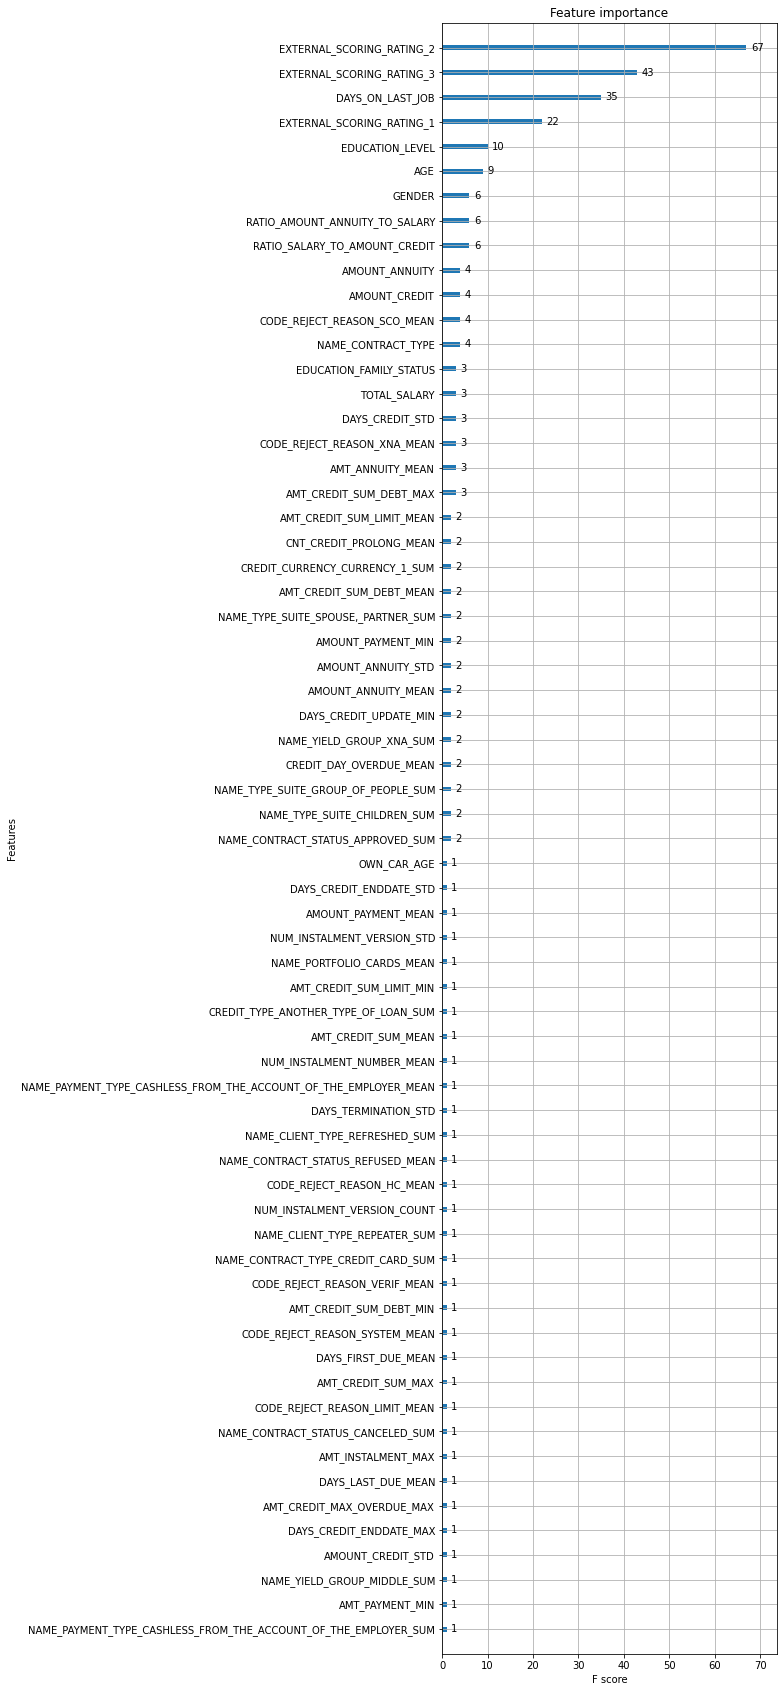

In [160]:
xgb.plot_importance(xg_reg, max_num_features = 330)
plt.rcParams['figure.figsize'] = [40, 5]
plt.show()

In [162]:
f_i = xg_reg.get_score(importance_type='gain')
f_i

{'AGE': 27.676747638888894,
 'AMOUNT_ANNUITY': 29.6528816125,
 'AMOUNT_ANNUITY_MEAN': 2.0322876,
 'AMOUNT_ANNUITY_STD': 5.0423583999999995,
 'AMOUNT_CREDIT': 37.01852416,
 'AMOUNT_CREDIT_STD': 2.01098633,
 'AMOUNT_PAYMENT_MEAN': 4.86437988,
 'AMOUNT_PAYMENT_MIN': 2.207092285,
 'AMT_ANNUITY_MEAN': 7.086637496666667,
 'AMT_CREDIT_MAX_OVERDUE_MAX': 4.19824219,
 'AMT_CREDIT_SUM_DEBT_MAX': 2.6540527333333332,
 'AMT_CREDIT_SUM_DEBT_MEAN': 4.19189453,
 'AMT_CREDIT_SUM_DEBT_MIN': 6.04684448,
 'AMT_CREDIT_SUM_LIMIT_MEAN': 3.923583985,
 'AMT_CREDIT_SUM_LIMIT_MIN': 2.35766602,
 'AMT_CREDIT_SUM_MAX': 5.21142578,
 'AMT_CREDIT_SUM_MEAN': 8.80686951,
 'AMT_INSTALMENT_MAX': 2.46166992,
 'AMT_PAYMENT_MIN': 1.93164062,
 'CNT_CREDIT_PROLONG_MEAN': 5.02984619,
 'CODE_REJECT_REASON_HC_MEAN': 8.18346119,
 'CODE_REJECT_REASON_LIMIT_MEAN': 6.35015869,
 'CODE_REJECT_REASON_SCO_MEAN': 2.5529785175,
 'CODE_REJECT_REASON_SYSTEM_MEAN': 4.91967773,
 'CODE_REJECT_REASON_VERIF_MEAN': 7.6237793,
 'CODE_REJECT_REASON_X

In [164]:
keys = list(f_i.keys())
values = list(f_i.values())

fi_dt = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
fi_dt

,score
EDUCATION_LEVEL,94.132520
EXTERNAL_SCORING_RATING_3,83.830755
EXTERNAL_SCORING_RATING_2,50.365288
AMOUNT_CREDIT,37.018524
AMOUNT_ANNUITY,29.652882
...,...
NAME_YIELD_GROUP_XNA_SUM,2.008057
AMT_PAYMENT_MIN,1.931641
NAME_CONTRACT_STATUS_CANCELED_SUM,1.534180
NUM_INSTALMENT_VERSION_STD,0.920166


### Валидация на LGBM

In [191]:
def get_model_lgbm_reg_hp(parameters, X, y):
    clf = GridSearchCV(
        estimator=lgbm.LGBMRegressor(subsample=0.5, random_state=42),
        param_grid=parameters,
        scoring='roc_auc',
        cv=5,
        return_train_score = True
    )
    
    clf.fit(X, y)
    
    cv_results = pd.DataFrame(clf.cv_results_)

    #print(cv_results.columns)
    
    param_columns = [
        column
        for column in cv_results.columns
        if column.startswith('param_')
    ]

    score_columns = ['mean_test_score', 'mean_train_score']

    cv_results = (cv_results[param_columns + score_columns]
                  .sort_values(by=score_columns, ascending=False))

    print(cv_results)
    print(f"\nbest params: {clf.best_params_}\n")
    return clf

In [192]:
parameters_l = {
    'n_estimators': [50], #, 800, 1000
    'max_depth': [5], #, 9
    'learning_rate': [0.1] #, 0.08, 0.03, 0.01, 0.007
}

In [193]:
clf_l = get_model_lgbm_reg_hp(parameters_l, train_prep.drop(["APPLICATION_NUMBER", "TARGET"], axis=1),  train_prep["TARGET"])

  param_learning_rate param_max_depth param_n_estimators  mean_test_score  \
0                 0.1               5                 50         0.713889   

   mean_train_score  
0          0.768018  

best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}



  param_learning_rate param_max_depth param_n_estimators  mean_test_score  \
1                 0.1               5                 50         0.713889   
3                0.08               5                 50         0.713606   
0                 0.1               3                 50         0.712794   
2                0.08               3                 50         0.710360   

   mean_train_score  
1          0.768018  
3          0.759777  
0          0.725367  
2          0.721837  

best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}

In [197]:
params_l = {}
params_l["learning_rate"] = clf_l.best_params_['learning_rate']
params_l["n_estimators"] = clf_l.best_params_['n_estimators']
params_l["random_state"] = 42
params_l["silent"] = 1
params_l["max_depth"] = clf_l.best_params_['max_depth']
params_l["eval_metric"] = "auc"

In [198]:
def make_cross_validation_adapt_l(X: pd.DataFrame,
                                  y: pd.Series,
                                  params: Dict,
                                  metric: callable,
                                  cv_strategy):
    """
    Кросс-валидация.

    Parameters
    ----------
    X: pd.DataFrame
        Матрица признаков.

    y: pd.Series
        Вектор целевой переменной.

    params: Dict
        Параметры модели.

    metric: callable
        Метрика для оценки качества решения.
        Ожидается, что на вход будет передана функция,
        которая принимает 2 аргумента: y_true, y_pred.

    cv_strategy: cross-validation generator
        Объект для описания стратегии кросс-валидации.
        Ожидается, что на вход будет передан объект типа
        KFold или StratifiedKFold.

    Returns
    -------
    oof_score: float
        Значение метрики качества на OOF-прогнозах.

    fold_train_scores: List[float]
        Значение метрики качества на каждом обучающем датасете кросс-валидации.

    fold_valid_scores: List[float]
        Значение метрики качества на каждом валидационном датасете кросс-валидации.

    oof_predictions: np.array
        Прогнозы на OOF.

    """
    estimators, fold_train_scores, fold_valid_scores = [], [], []
    oof_predictions = np.zeros(X.shape[0])

    plst = list(params.items())

    num_rounds=1000 
    
    for fold_number, (train_idx, valid_idx) in enumerate(cv_strategy.split(X, y)):
        x_train, x_valid = X.loc[train_idx], X.loc[valid_idx]
        y_train, y_valid = y.loc[train_idx], y.loc[valid_idx]

        model = lgbm.LGBMRegressor(max_depth=params['max_depth'], 
                                   n_estimators=params['n_estimators'], 
                                   # num_leaves=params['num_leaves'],
                                   subsample=0.5, 
                                   learning_rate=params['learning_rate'], 
                                   random_state=42)

        model.fit(x_train, 
                  y_train, 
                  early_stopping_rounds=10, 
                  eval_set = [(x_valid, y_valid)], 
                  eval_metric = 'auc',
                  verbose=False)

        y_train_pred = model.predict(x_train)
        y_valid_pred = model.predict(x_valid)

        fold_train_scores.append(metric(y_train, y_train_pred))
        fold_valid_scores.append(metric(y_valid, y_valid_pred))
        oof_predictions[valid_idx] = y_valid_pred

        msg = (
            f"Fold: {fold_number+1}, train-observations = {len(train_idx)}, "
            f"valid-observations = {len(valid_idx)}\n"
            f"train-score = {round(fold_train_scores[fold_number], 4)}, "
            f"valid-score = {round(fold_valid_scores[fold_number], 4)}" 
        )
        print(msg)
        print("="*69)
        estimators.append(model)

    oof_score = metric(y, oof_predictions)
    print(f"CV-results train: {round(np.mean(fold_train_scores), 4)} +/- {round(np.std(fold_train_scores), 3)}")
    print(f"CV-results valid: {round(np.mean(fold_valid_scores), 4)} +/- {round(np.std(fold_valid_scores), 3)}")
    print(f"OOF-score = {round(oof_score, 4)}")

    return estimators, oof_score, fold_train_scores, fold_valid_scores, oof_predictions

In [199]:
cv_strategy = KFold(n_splits=5, random_state=42)

estimators, oof_score, fold_train_scores, fold_valid_scores, oof_predictions = make_cross_validation_adapt_l(
    train_prep.drop(["APPLICATION_NUMBER", "TARGET"], axis=1),
    train_prep["TARGET"],
    params=params_l,
    metric=roc_auc_score, 
    cv_strategy=cv_strategy
)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Fold: 1, train-observations = 88074, valid-observations = 22019
train-score = 0.7664, valid-score = 0.7116
Fold: 2, train-observations = 88074, valid-observations = 22019
train-score = 0.7653, valid-score = 0.7098
Fold: 3, train-observations = 88074, valid-observations = 22019
train-score = 0.7655, valid-score = 0.7184
Fold: 4, train-observations = 88075, valid-observations = 22018
train-score = 0.7685, valid-score = 0.7124
Fold: 5, train-observations = 88075, valid-observations = 22018
train-score = 0.7667, valid-score = 0.7184
CV-results train: 0.7665 +/- 0.001
CV-results valid: 0.7141 +/- 0.004
OOF-score = 0.7137


In [221]:
lgbm_params =  {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'auc',
    # "n_estimators": clf_l.best_params_['n_estimators'],
    "learning_rate": clf_l.best_params_['learning_rate'],
    "max_depth": clf_l.best_params_['max_depth'],
    "random_state": 42 
    }

In [208]:
dftrainLGB = lgbm.Dataset(data = train_prep.drop(["APPLICATION_NUMBER", "TARGET"], axis=1), 
                          label = train_prep["TARGET"])
                        #   feature_name = list(x_train))

cv_results_l = lgbm.cv(
        lgbm_params,
        dftrainLGB,
        num_boost_round=1000,
        nfold=5,
        metrics='auc',
        early_stopping_rounds=10
        )

In [213]:
# cv_results_l

In [214]:
print(f"lgbm.cv auc-mean: {cv_results_l['auc-mean'][len(cv_results_l['auc-mean'])-1]:.4f}, auc-stdv: {cv_results_l['auc-stdv'][len(cv_results_l['auc-stdv'])-1]:.4f}")

lgbm.cv auc-mean: 0.7122, auc-stdv: 0.0062


In [226]:
X_train, X_valid, y_train, y_valid = train_test_split(train_prep.drop(["APPLICATION_NUMBER", "TARGET"], axis=1), 
                                                      train_prep["TARGET"], 
                                                      test_size=0.2, 
                                                      random_state=42)

train_data = lgbm.Dataset(X_train, label=y_train)
test_data = lgbm.Dataset(X_valid, label=y_valid)

model = lgbm.train(lgbm_params,
                   train_data,
                   valid_sets=test_data,
                   num_boost_round=1000,
                   early_stopping_rounds=10,
                   verbose_eval=False)

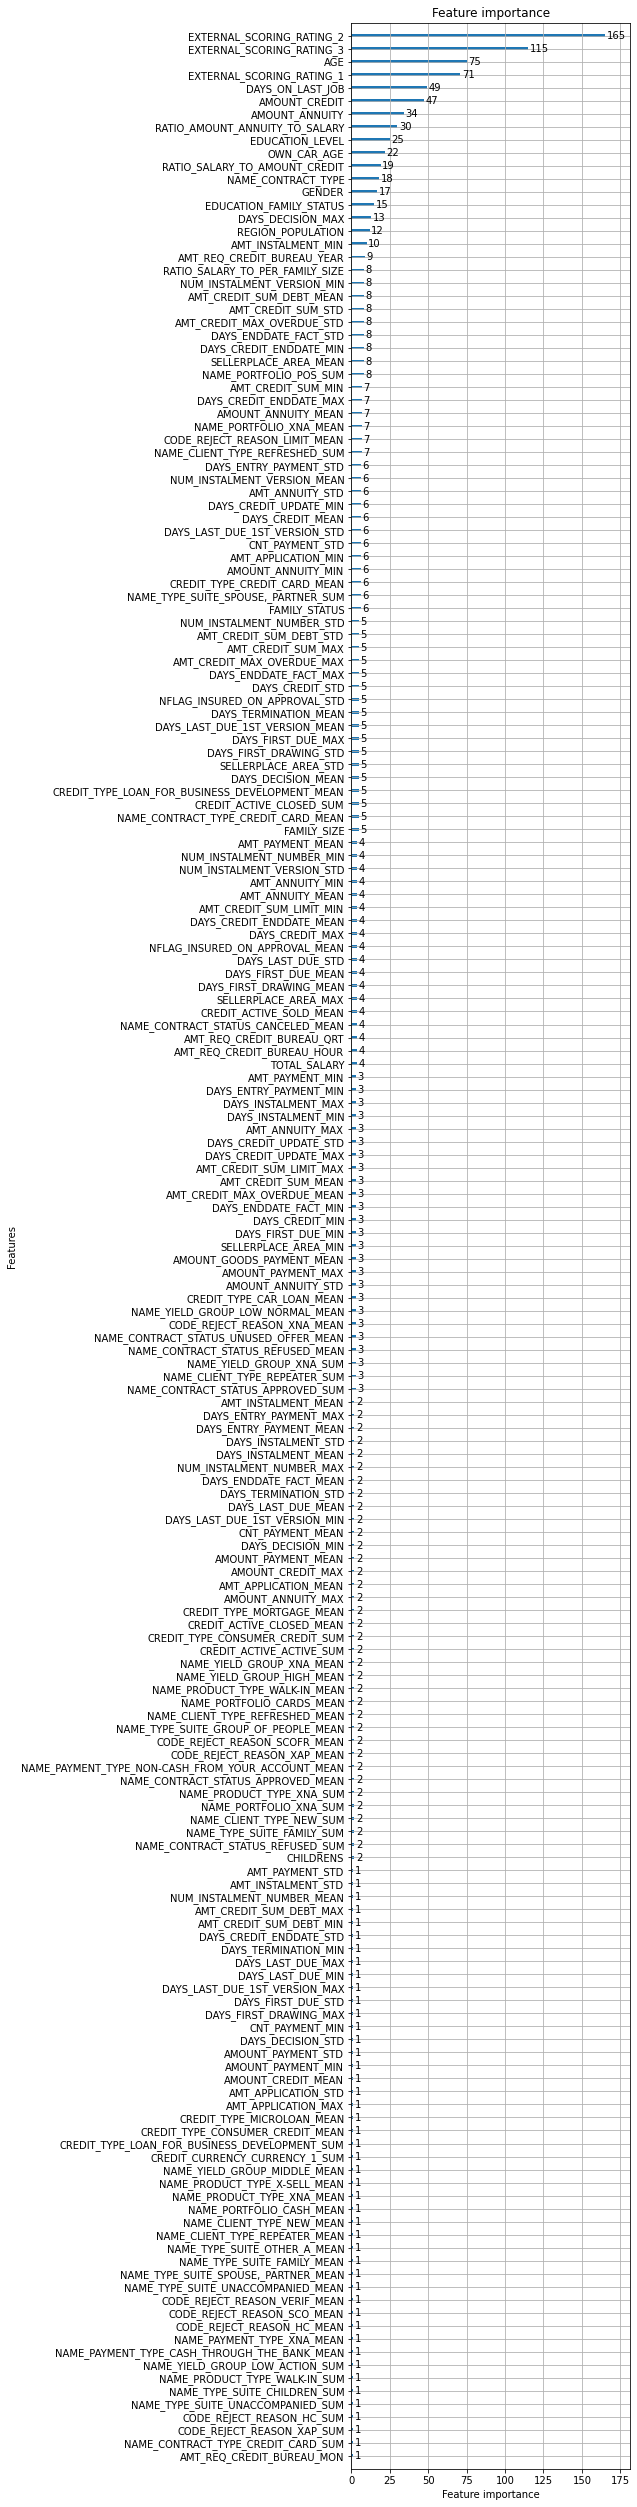

In [231]:
ax = lgbm.plot_importance(model, max_num_features=325, figsize=(5,45))   #, figsize=(45,5)
plt.show()

In [252]:
# keys = X_train.columns
# values = model.feature_importance()

# fi_dt = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
# fi_dt

In [243]:
feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X_train.columns})

In [249]:
f_imp = feature_imp.sort_values("Value", ascending=False).reset_index(drop=True)

In [245]:
pd.set_option('display.max_rows', 20)

In [255]:
f_imp.loc[f_imp['Value'] > 1, 'Feature']

0                              EXTERNAL_SCORING_RATING_2
1                              EXTERNAL_SCORING_RATING_3
2                                                    AGE
3                              EXTERNAL_SCORING_RATING_1
4                                       DAYS_ON_LAST_JOB
                             ...                        
136    NAME_PAYMENT_TYPE_NON-CASH_FROM_YOUR_ACCOUNT_MEAN
137                     NAME_CONTRACT_STATUS_REFUSED_SUM
138                           NAME_YIELD_GROUP_HIGH_MEAN
139                            NAME_PRODUCT_TYPE_XNA_SUM
140                   NAME_CONTRACT_STATUS_APPROVED_MEAN
Name: Feature, Length: 141, dtype: object

In [256]:
col_list = f_imp.loc[f_imp['Value'] > 1, 'Feature'].values

In [257]:
train_crop = train_prep[col_list]

In [263]:
train_crop.to_csv(data_dir + "train_crop.csv", sep=";", index=False)

In [264]:
parameters_l2 = {
    'n_estimators': [200, 500], #, 800, 1000
    'max_depth': [5, 9], #, 7
    'learning_rate': [0.1, 0.03] #, 0.08, 0.01, 0.007
}

In [265]:
clf_l2 = get_model_lgbm_reg_hp(parameters_l2, train_crop,  train_prep["TARGET"])

  param_learning_rate param_max_depth param_n_estimators  mean_test_score  \
6                0.03               9                200         0.716293   
4                0.03               5                200         0.716208   
5                0.03               5                500         0.714624   
7                0.03               9                500         0.713860   
0                 0.1               5                200         0.711063   
2                 0.1               9                200         0.703169   
1                 0.1               5                500         0.699629   
3                 0.1               9                500         0.684574   

   mean_train_score  
6          0.787993  
4          0.775559  
5          0.822646  
7          0.861003  
0          0.840415  
2          0.880757  
1          0.914098  
3          0.955446  

best params: {'learning_rate': 0.03, 'max_depth': 9, 'n_estimators': 200}



In [266]:
params_l2 = {}
params_l2["learning_rate"] = clf_l2.best_params_['learning_rate']
params_l2["n_estimators"] = clf_l2.best_params_['n_estimators']
params_l2["random_state"] = 42
params_l2["silent"] = 1
params_l2["max_depth"] = clf_l2.best_params_['max_depth']
params_l2["eval_metric"] = "auc"

In [267]:
cv_strategy = KFold(n_splits=5, random_state=42)

estimators, oof_score, fold_train_scores, fold_valid_scores, oof_predictions = make_cross_validation_adapt_l(
    train_crop,
    train_prep["TARGET"],
    params=params_l2,
    metric=roc_auc_score, 
    cv_strategy=cv_strategy
)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Fold: 1, train-observations = 88074, valid-observations = 22019
train-score = 0.7812, valid-score = 0.7153
Fold: 2, train-observations = 88074, valid-observations = 22019
train-score = 0.7797, valid-score = 0.7134
Fold: 3, train-observations = 88074, valid-observations = 22019
train-score = 0.7786, valid-score = 0.7237
Fold: 4, train-observations = 88075, valid-observations = 22018
train-score = 0.7683, valid-score = 0.7128
Fold: 5, train-observations = 88075, valid-observations = 22018
train-score = 0.7432, valid-score = 0.7156
CV-results train: 0.7702 +/- 0.014
CV-results valid: 0.7161 +/- 0.004
OOF-score = 0.7154


In [272]:
lgbm_params2 =  {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'auc',
    # "n_estimators": clf_l2.best_params_['n_estimators'],
    "learning_rate": clf_l2.best_params_['learning_rate'],
    "max_depth": clf_l2.best_params_['max_depth'],
    "random_state": 42 
    }

In [273]:
dftrainLGB = lgbm.Dataset(data = train_crop, 
                          label = train_prep["TARGET"])
                        #   feature_name = list(x_train))

cv_results_l2 = lgbm.cv(
        lgbm_params2,
        dftrainLGB,
        num_boost_round=1000,
        nfold=5,
        metrics='auc',
        early_stopping_rounds=10
        )

In [274]:
print(f"lgbm.cv auc-mean: {cv_results_l2['auc-mean'][len(cv_results_l2['auc-mean'])-1]:.4f}, auc-stdv: {cv_results_l2['auc-stdv'][len(cv_results_l2['auc-stdv'])-1]:.4f}")

lgbm.cv auc-mean: 0.7138, auc-stdv: 0.0047


## Задание №1

Признак TransactionDT - это смещение в секундах относительно базовой даты. Базовая дата - 2017-12-01, преобразовать признак TransactionDT в datetime, прибавив к базовой дате исходное значение признака. Из полученного признака выделить год, месяц, день недели, час, день.

## Задание №2

Сгруппировать данные по card1 и посчитать среднюю сумму транзакции. Добавить в качестве признака в набор данных. Посчитать разницу между суммой транзакцией пользователя и средней суммой транзакции по данному типу card1. Построить отношение этих признаков. Повторить процедуру для всех card.

## Задание №3

Преобразовать признаки card_1 - card_6 с помощью Frequency Encoding;

## Задание №4

Преобразовать признак TransactionAmt в логарифм признака, выделить дробную часть и целую часть в отдельные признаки.

## Задание №5

Для числовых признаков построить PCA-признаки, добавить их к основной части датасета.

## Задание №6

Использовать критерий отбора признаков на основе перестановок для отбора признаков, которые положительно влияют на перформанс модели. Переобучить модель и сделать выводы о полученном качестве алгоритма.

## Задание №7

Испольовать SHAP для оценки важности признаков. Использовать SHAP для отбора признаков, проанализировать поведение модели на одном (любом) примере, посмотреть какой вклад каждый признак вносит в итоговый прогно. Проанализировать резульаты.